# Experiment 02: Influence of weight coefficients

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

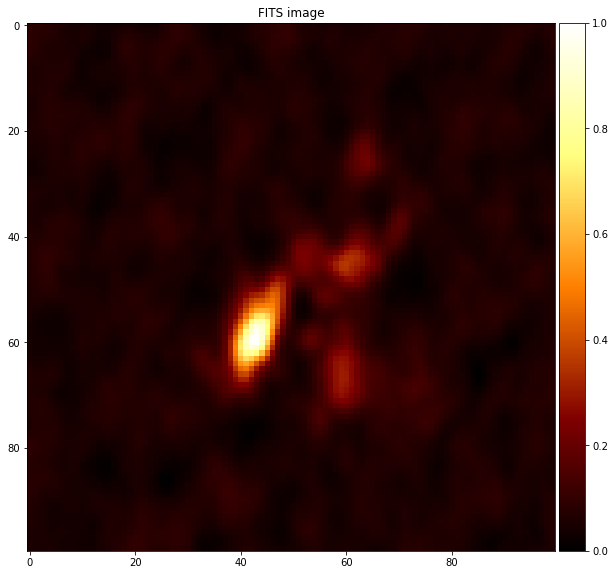

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Orion.cont.image.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/home/mavillan/anaconda3/lib/python3.6/site-packages/traitlets/traitlets.py:567: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  silent = bool(old_value == new_value)


<function graph.thresholded_image_plot>

## `Case 1 `:   $\alpha_1 \in [0,10]$

In [6]:
elm_list = list()
alpha1 = np.arange(0.,10.1,0.5)

for a1 in alpha1:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 250
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*250)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=3.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=a1, lamb1=1., b=0., lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

##########################################################################################
Processing example with alpha1: 0.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.003986512502676818
Residual Variance: 1.564144788579448e-05
Residual Entropy: 7.172757622018121
Added Flux: 1.149883024026569
Total elapsed time: 230.53919196128845 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0294694379375833
Mean min distance between collocation and center points: 0.00943279999306366

Homogeneity of solution:
Mean min distance in the (standarized) parameters space:

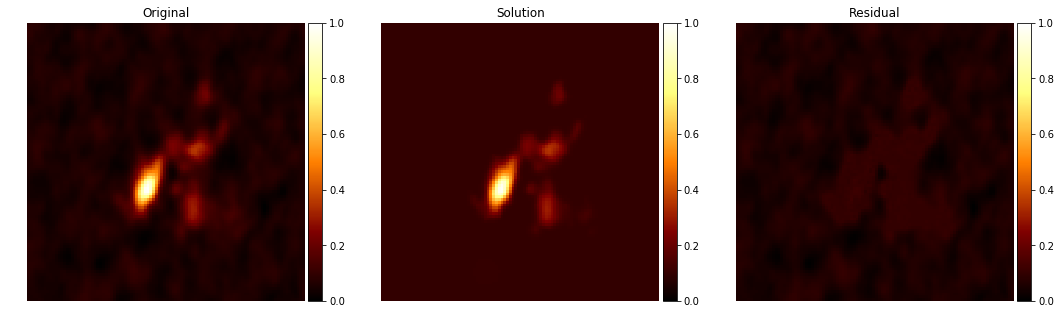

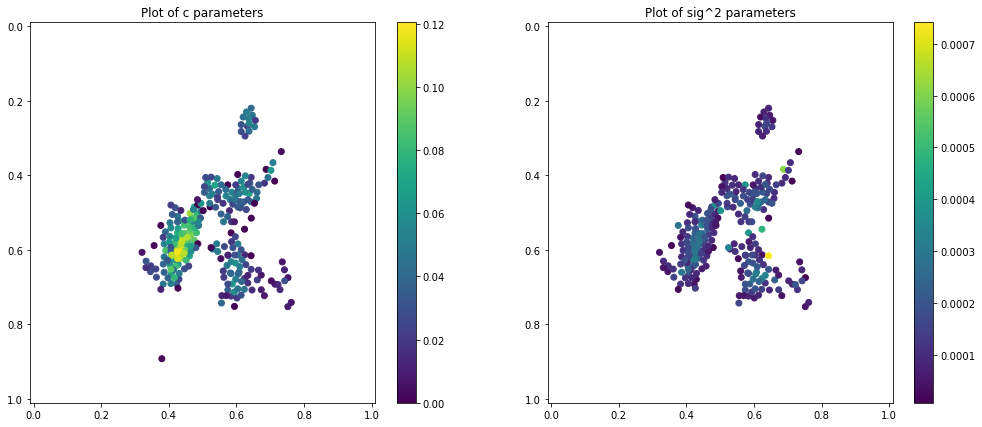

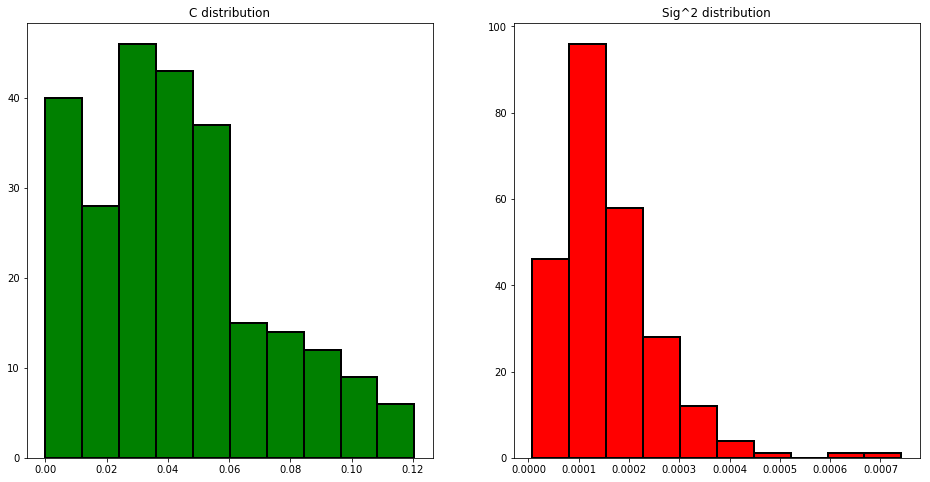

##########################################################################################
Processing example with alpha1: 0.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.004222854574591495
Residual Variance: 1.7530419851731174e-05
Residual Entropy: 6.8737579449329225
Added Flux: 1.1699684926925427
Total elapsed time: 225.16380381584167 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.033419926961560174
Mean min distance between collocation and center points: 0.00937779083696145

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

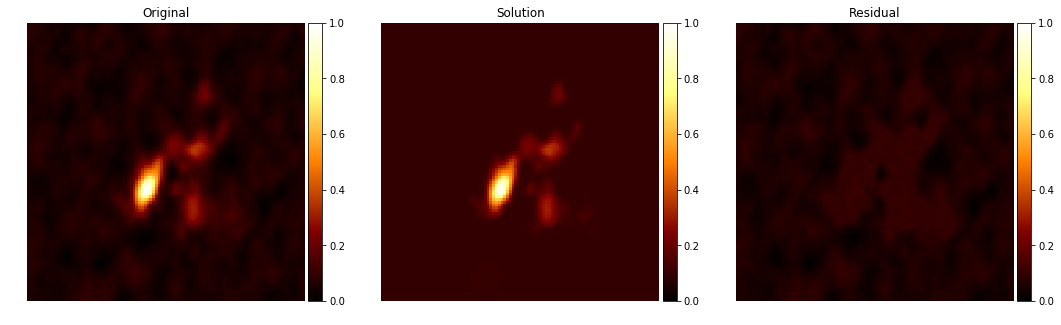

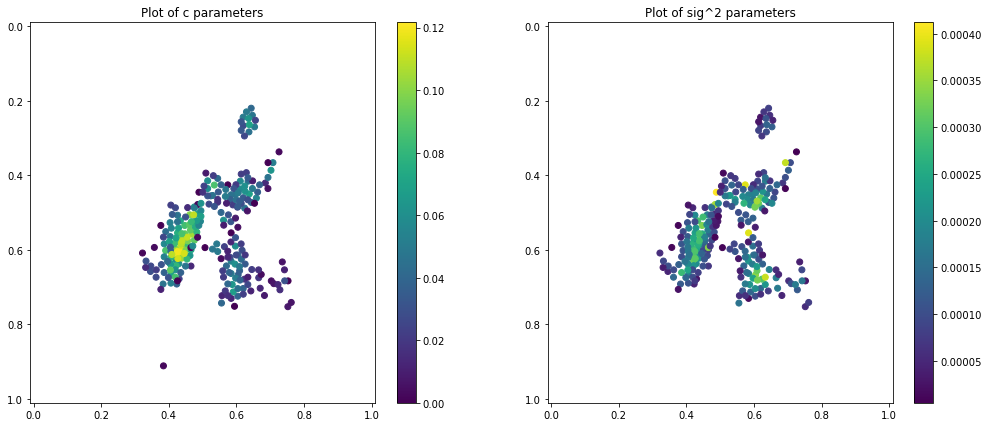

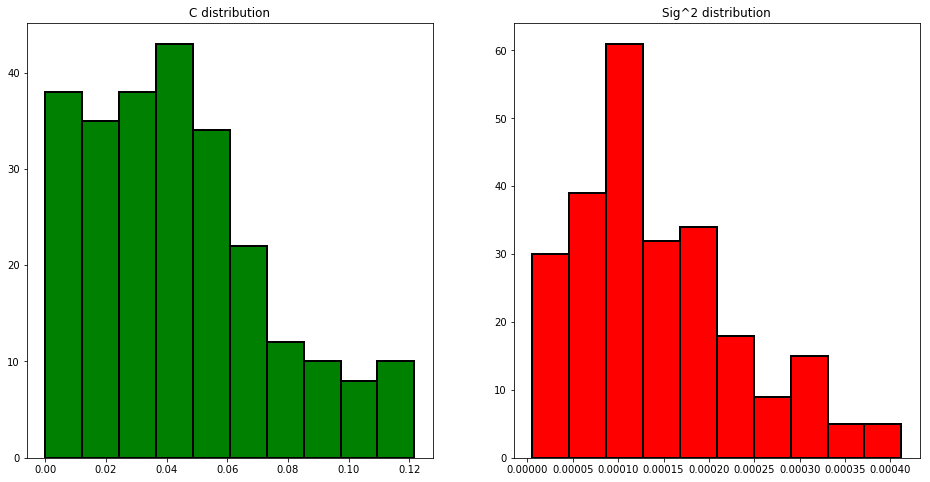

##########################################################################################
Processing example with alpha1: 1.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100112

Residual stats:
Residual RMS: 0.0039322110351157485
Residual Variance: 1.5157818114817298e-05
Residual Entropy: 7.25757038593798
Added Flux: 1.0926840069120467
Total elapsed time: 228.7559540271759 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02945185494747808
Mean min distance between collocation and center points: 0.009635283723929635

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

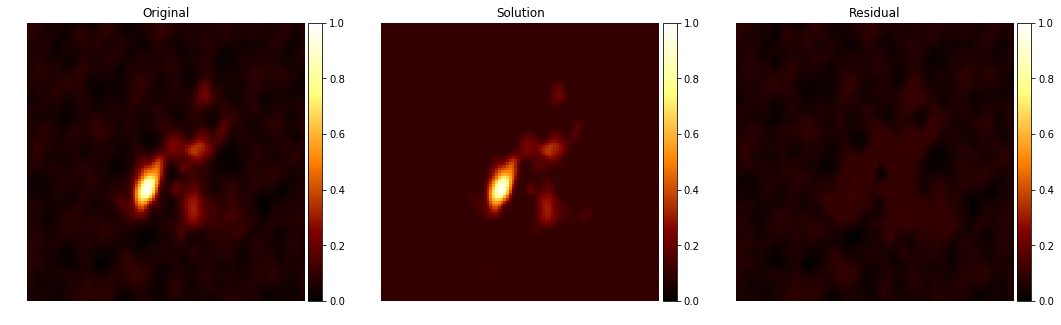

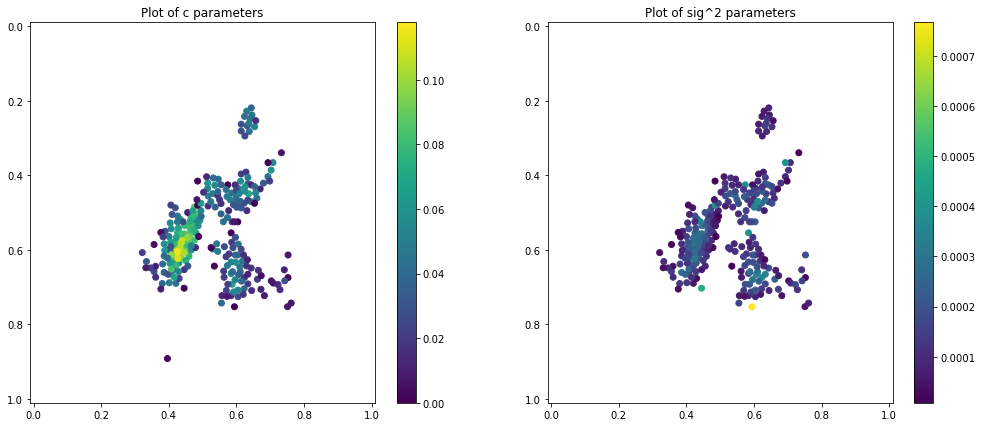

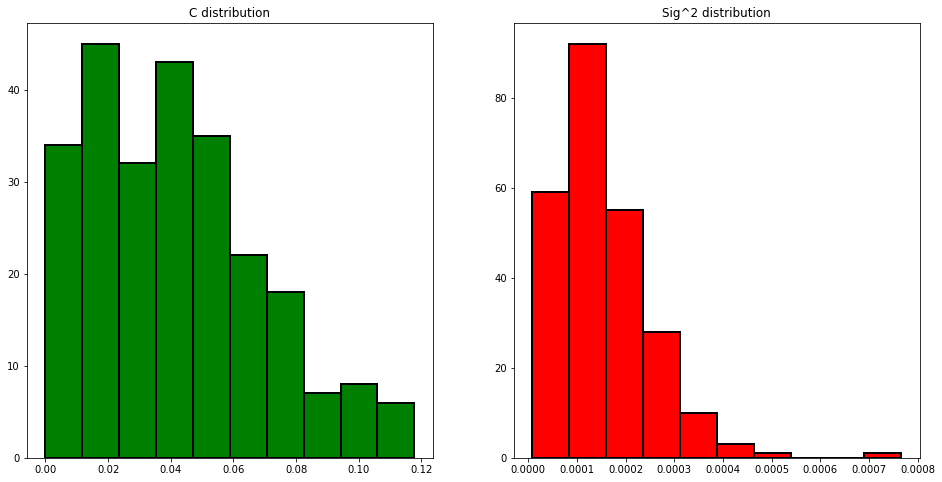

##########################################################################################
Processing example with alpha1: 1.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.0040688472445922635
Residual Variance: 1.6258774073563893e-05
Residual Entropy: 7.095475378588699
Added Flux: 1.1249457331077763
Total elapsed time: 232.31197690963745 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03329211105630777
Mean min distance between collocation and center points: 0.009679607349124089

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

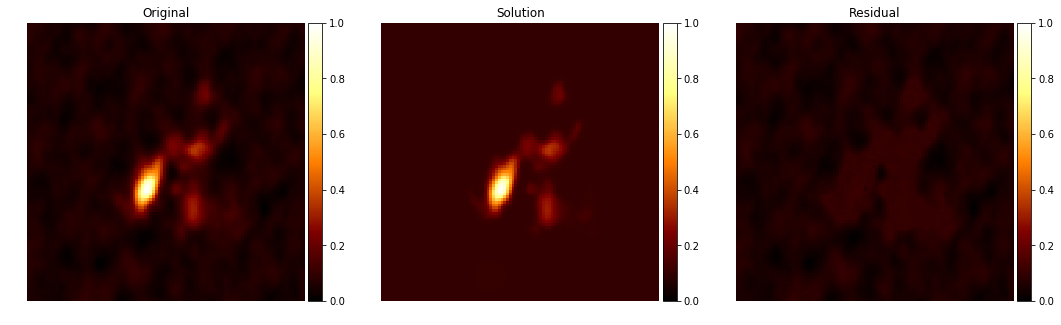

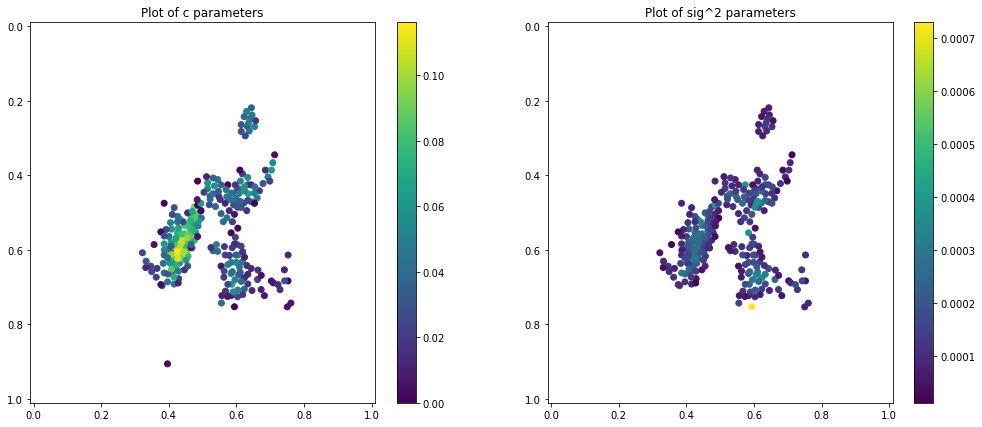

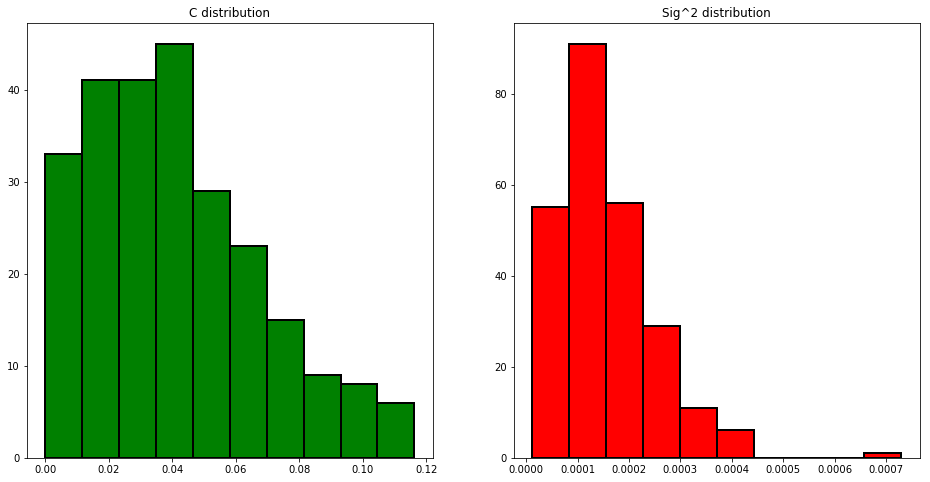

##########################################################################################
Processing example with alpha1: 2.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004072387162244576
Residual Variance: 1.629754184974725e-05
Residual Entropy: 7.0711240159601285
Added Flux: 1.1346942606461927
Total elapsed time: 230.2645149230957 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029438212259480102
Mean min distance between collocation and center points: 0.00954068460882161

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

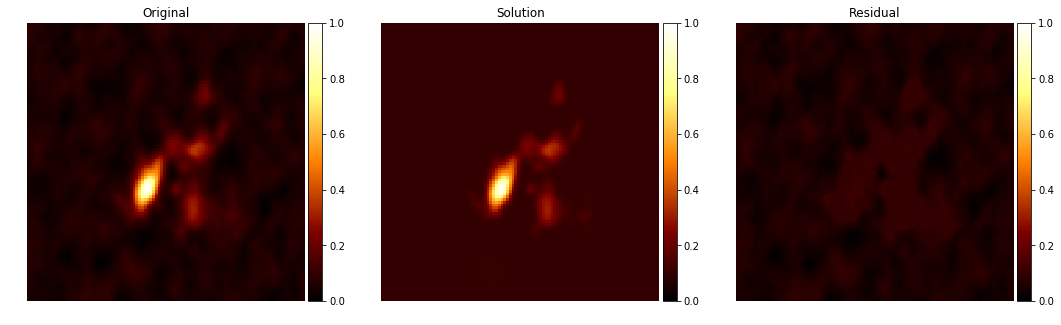

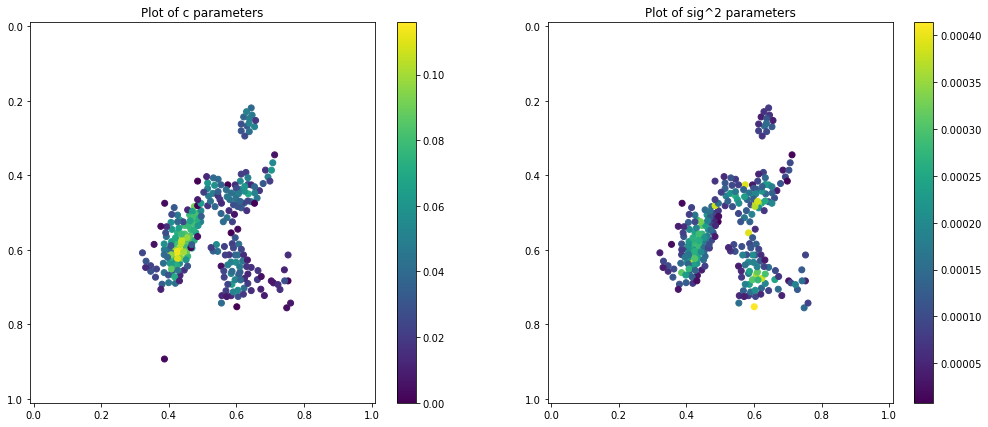

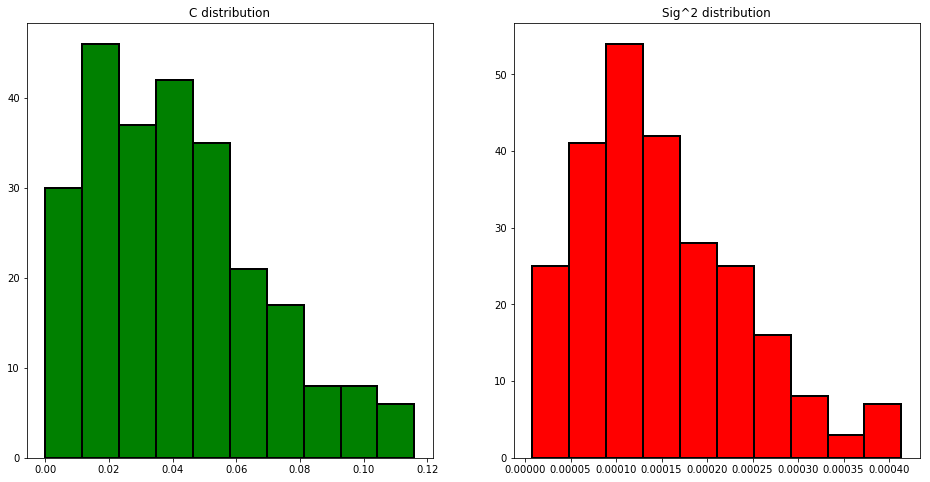

##########################################################################################
Processing example with alpha1: 2.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.00425847952184468
Residual Variance: 1.7869012620842124e-05
Residual Entropy: 6.8037719399947285
Added Flux: 1.1833854840744866
Total elapsed time: 223.48079919815063 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.030972721407733248
Mean min distance between collocation and center points: 0.009582484147674498

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

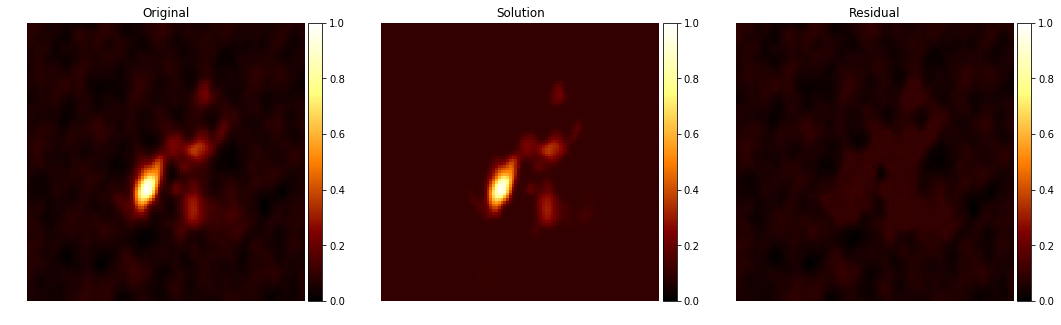

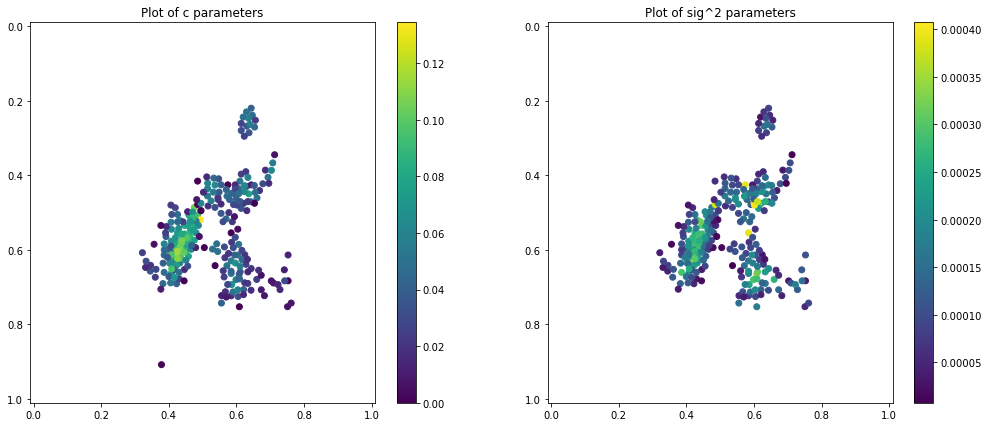

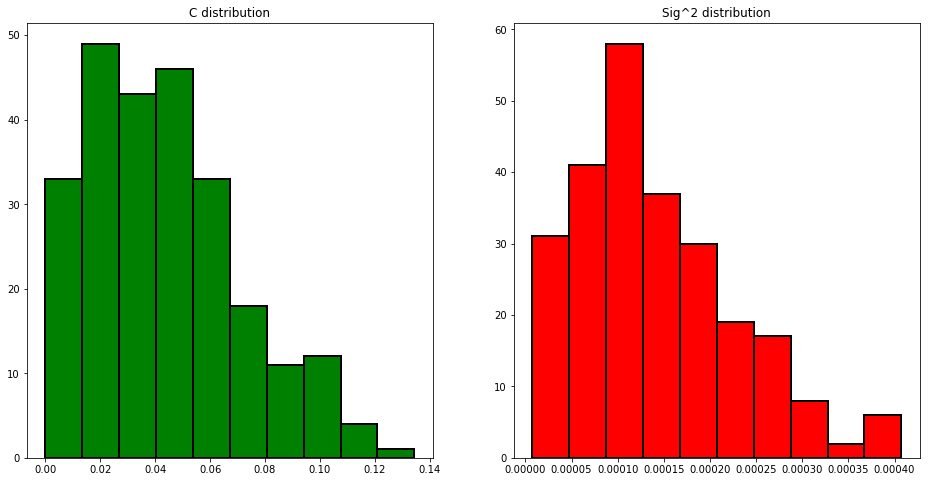

##########################################################################################
Processing example with alpha1: 3.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.004073499236099642
Residual Variance: 1.625078233531352e-05
Residual Entropy: 7.292847945852035
Added Flux: 1.1327861550074045
Total elapsed time: 225.07065272331238 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029419712733431802
Mean min distance between collocation and center points: 0.009521754278715903

Homogeneity of solution:
Mean min distance in the (standarized) parameters sp

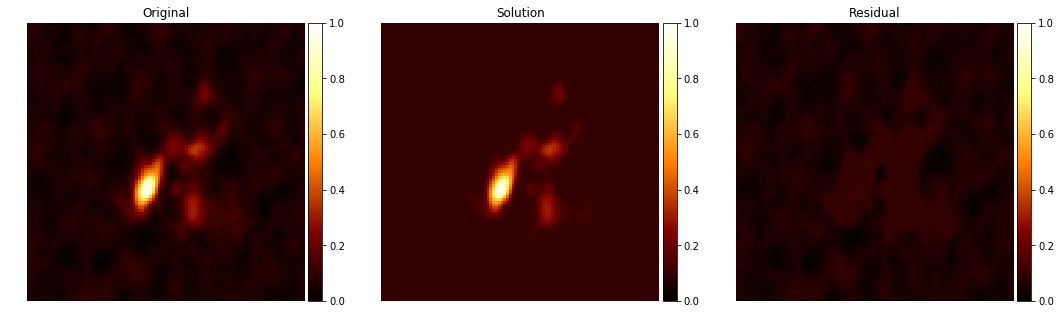

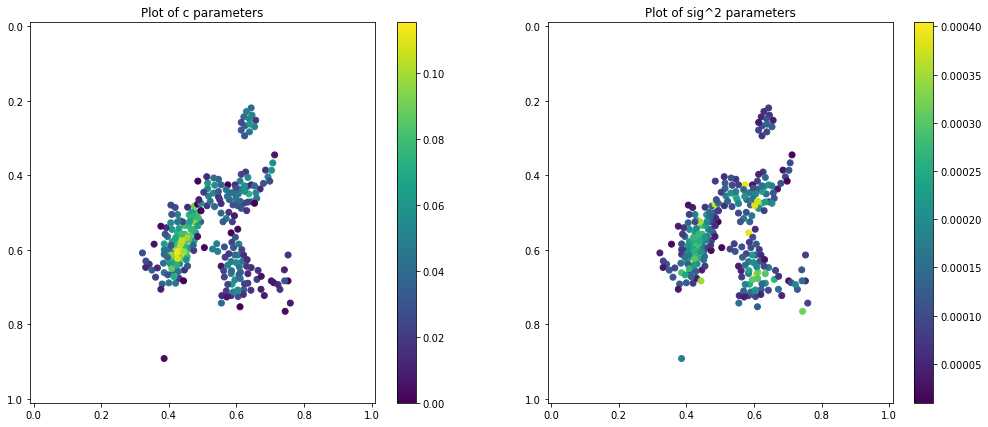

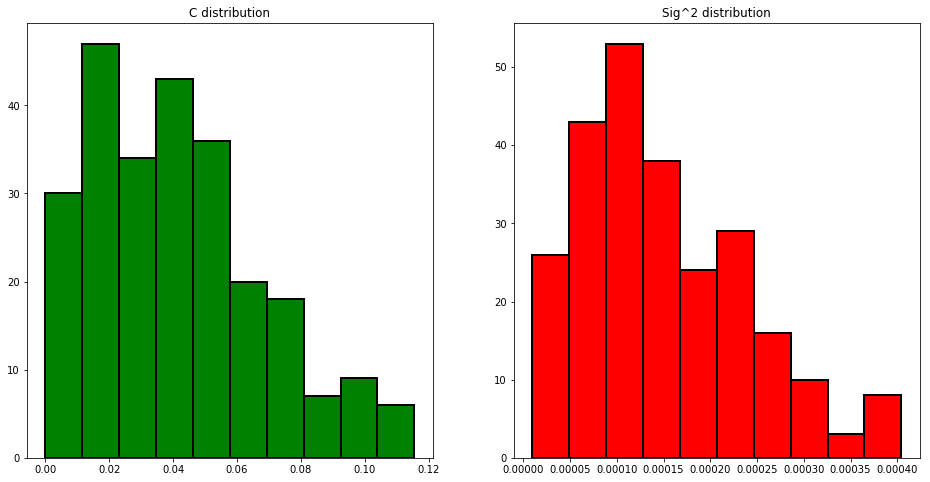

##########################################################################################
Processing example with alpha1: 3.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.004142629110943849
Residual Variance: 1.678915083296076e-05
Residual Entropy: 7.21547568855689
Added Flux: 1.148529774969826
Total elapsed time: 223.28633904457092 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029413103400098877
Mean min distance between collocation and center points: 0.009619067986222037

Homogeneity of solution:
Mean min distance in the (standarized) parameters spac

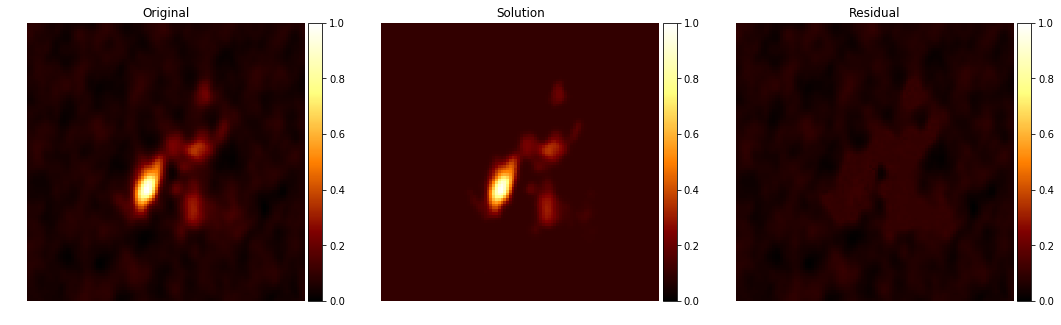

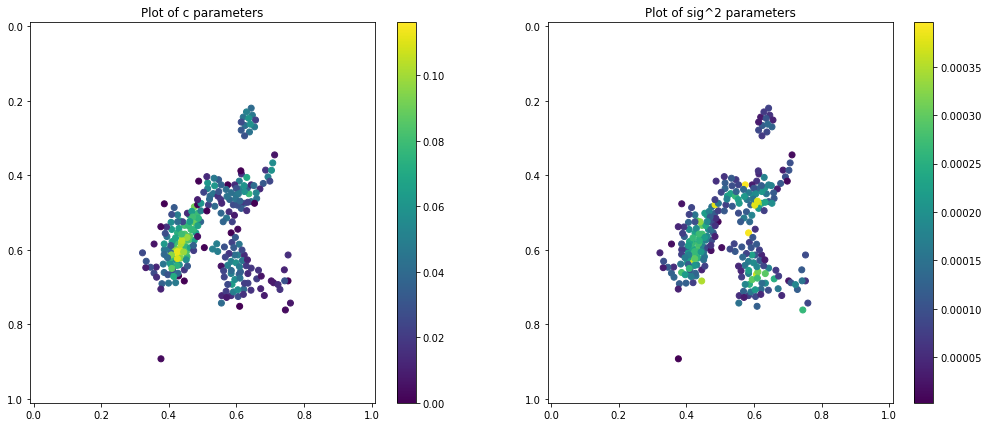

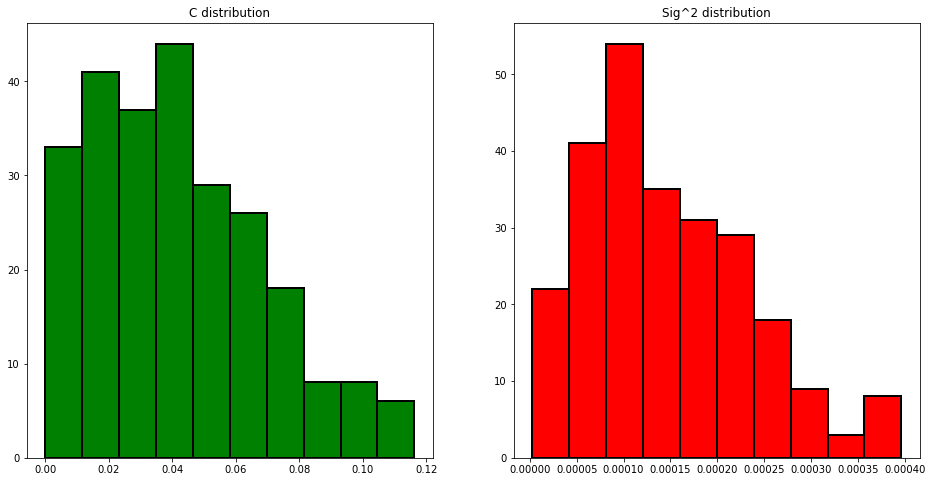

##########################################################################################
Processing example with alpha1: 4.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.00414659356917414
Residual Variance: 1.6794308441519977e-05
Residual Entropy: 7.157389589213462
Added Flux: 1.130920880892966
Total elapsed time: 228.1120502948761 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029414032145922555
Mean min distance between collocation and center points: 0.009555320232342263

Homogeneity of solution:
Mean min distance in the (standarized) parameters spac

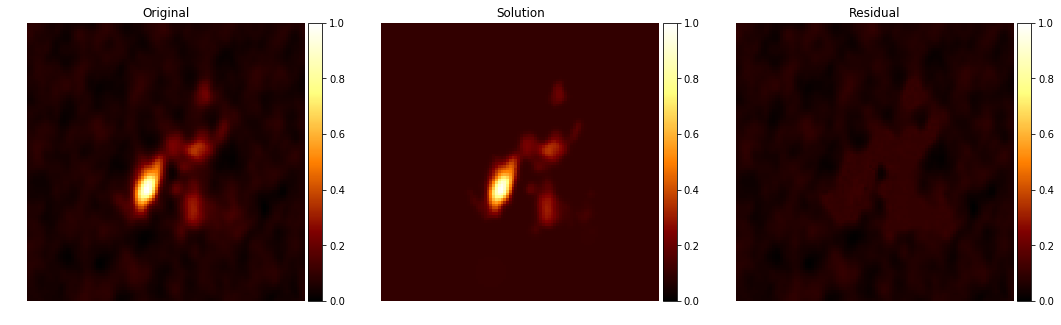

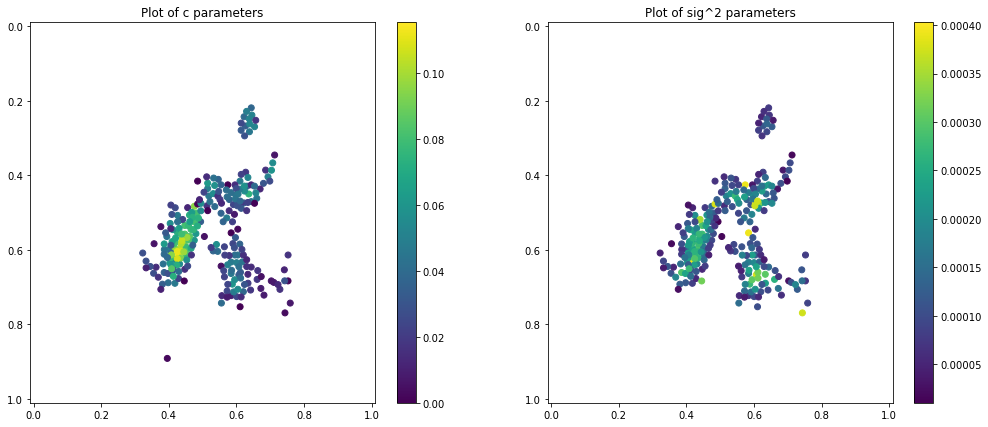

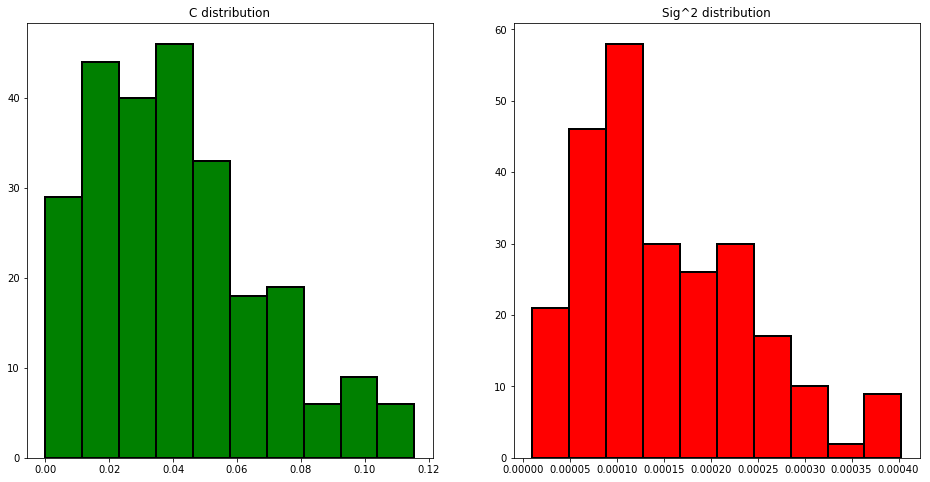

##########################################################################################
Processing example with alpha1: 4.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004110722730572463
Residual Variance: 1.6480721762190404e-05
Residual Entropy: 7.231400916420474
Added Flux: 1.1160786665339004
Total elapsed time: 225.00736236572266 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029405234524478706
Mean min distance between collocation and center points: 0.009606940206393166

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

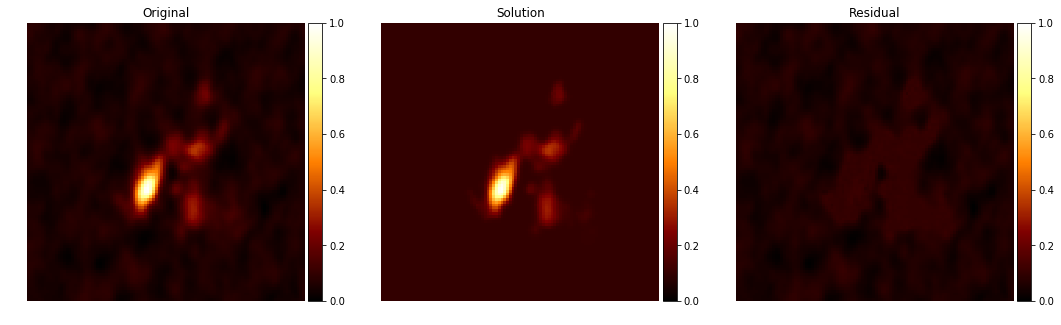

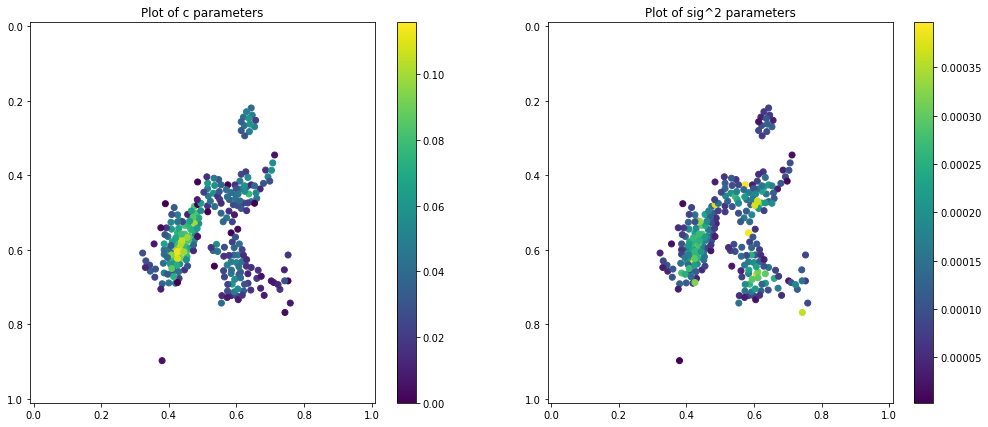

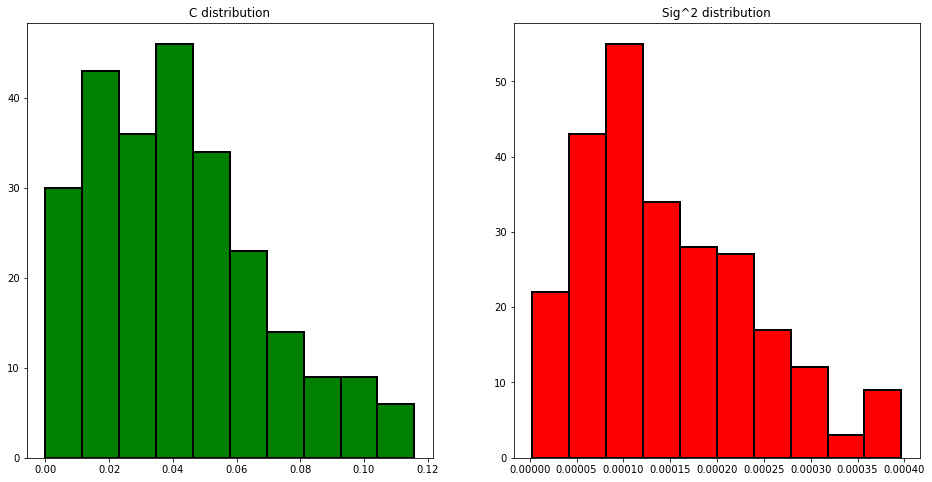

##########################################################################################
Processing example with alpha1: 5.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.0041066107862563535
Residual Variance: 1.6377247176998988e-05
Residual Entropy: 7.212229569341634
Added Flux: 1.0960752220474441
Total elapsed time: 225.55154466629028 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029387024852403496
Mean min distance between collocation and center points: 0.009720524107054

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

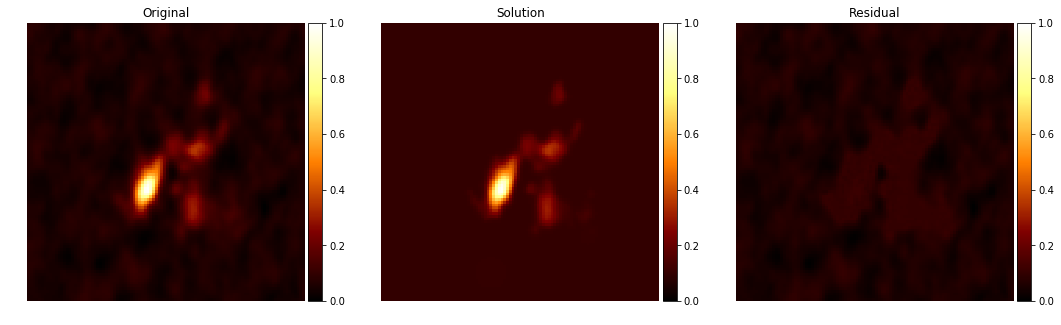

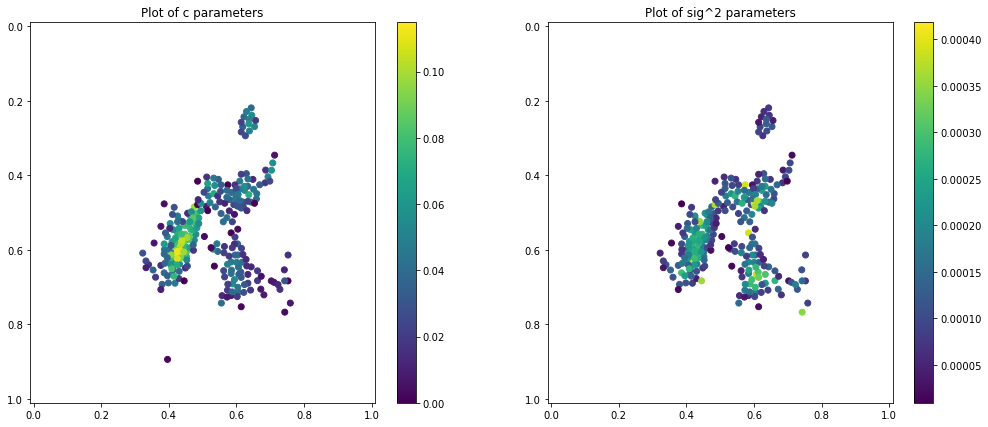

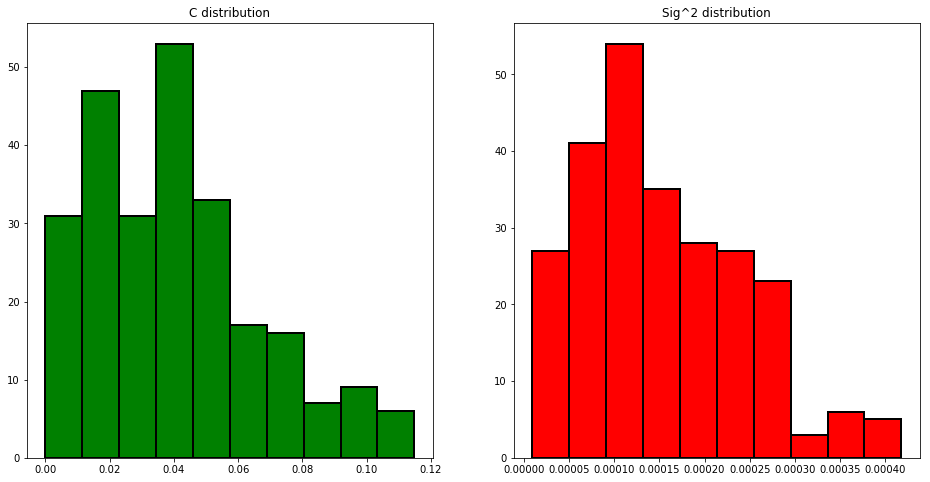

##########################################################################################
Processing example with alpha1: 5.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004175366004031584
Residual Variance: 1.6988700431548713e-05
Residual Entropy: 7.116577897878919
Added Flux: 1.1115450967550118
Total elapsed time: 223.5882465839386 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03393720468709586
Mean min distance between collocation and center points: 0.009627616927508059

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

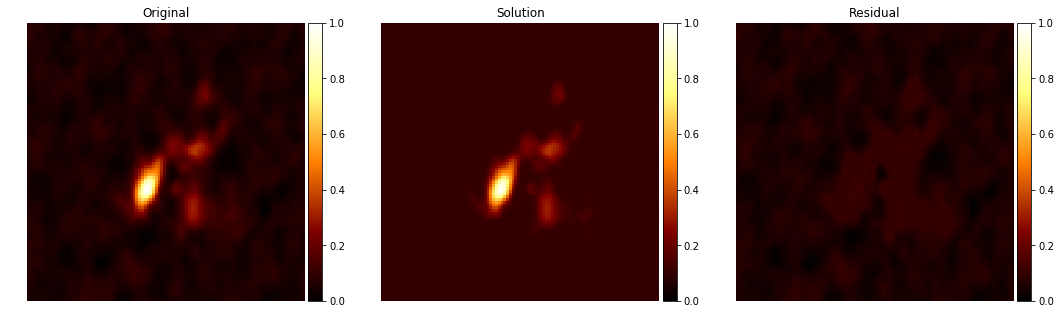

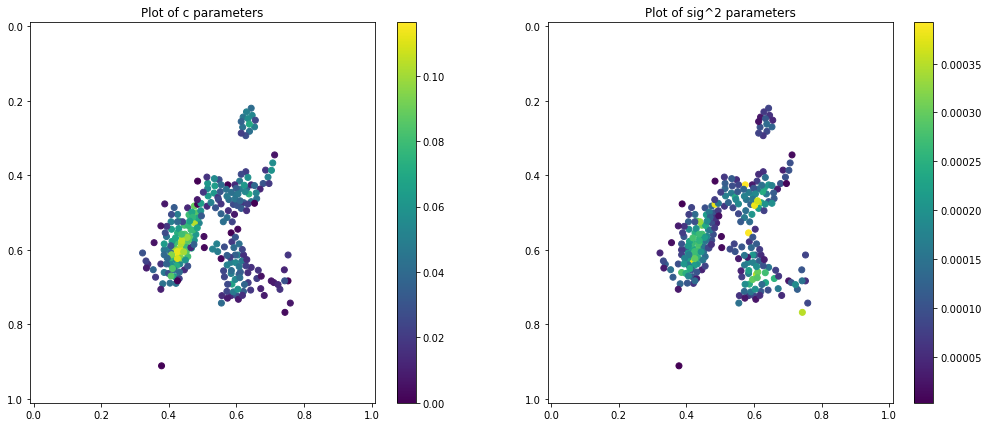

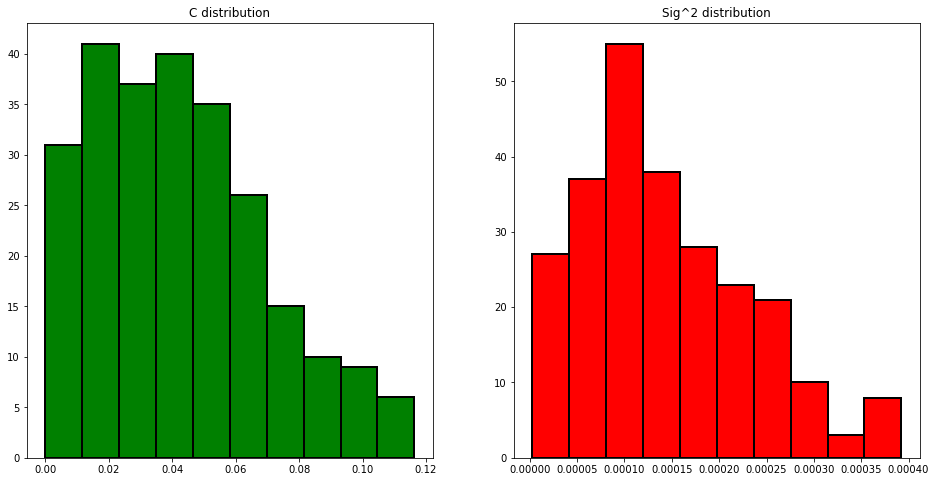

##########################################################################################
Processing example with alpha1: 6.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100109

Residual stats:
Residual RMS: 0.004139162744735127
Residual Variance: 1.6609290032024106e-05
Residual Entropy: 7.203732259373679
Added Flux: 1.0917506381017568
Total elapsed time: 228.72804021835327 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029403586082328525
Mean min distance between collocation and center points: 0.00967461709221672

Homogeneity of solution:
Mean min distance in the (standarized) parameters sp

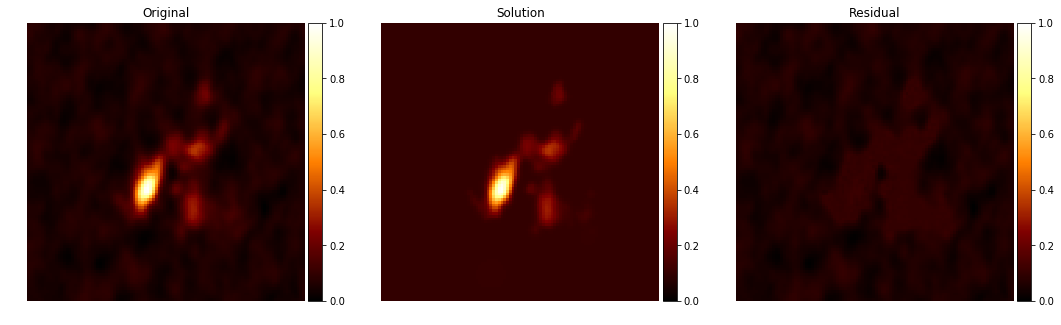

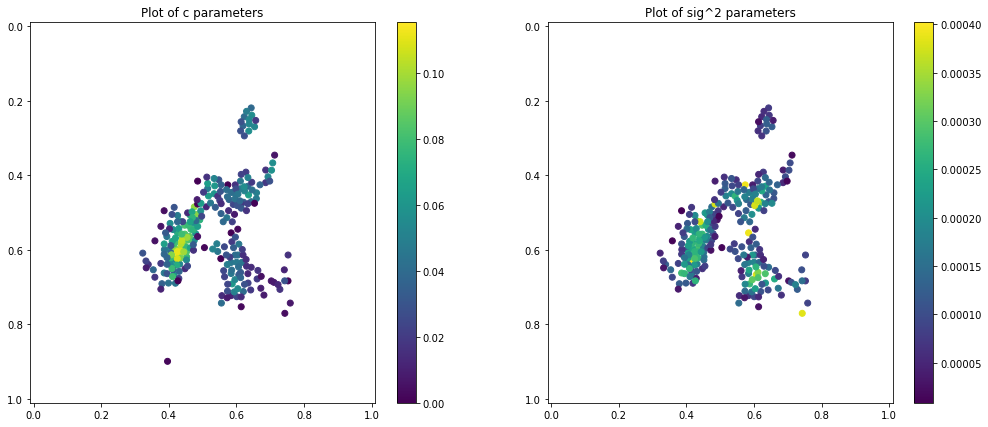

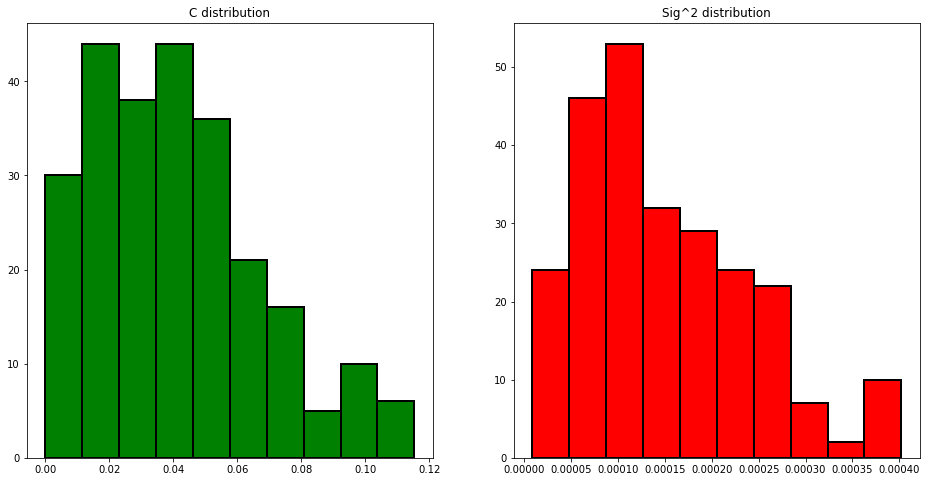

##########################################################################################
Processing example with alpha1: 6.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100114

Residual stats:
Residual RMS: 0.0041800793503487645
Residual Variance: 1.6967226624011144e-05
Residual Entropy: 7.189100025915597
Added Flux: 1.1062794082303
Total elapsed time: 230.6012237071991 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029403707537217626
Mean min distance between collocation and center points: 0.00963833192833408

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

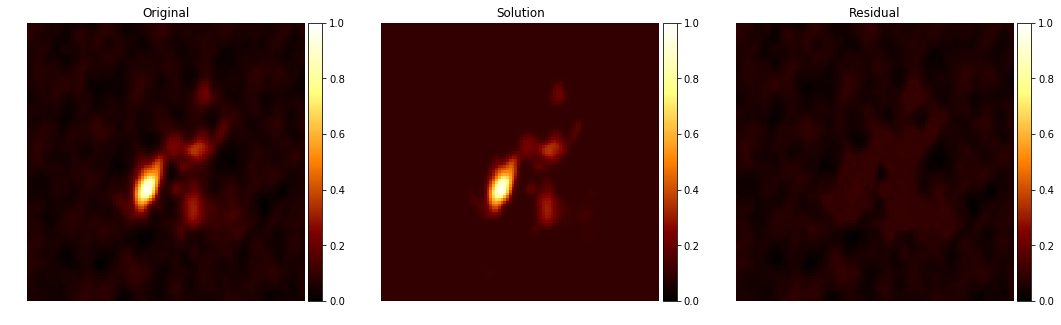

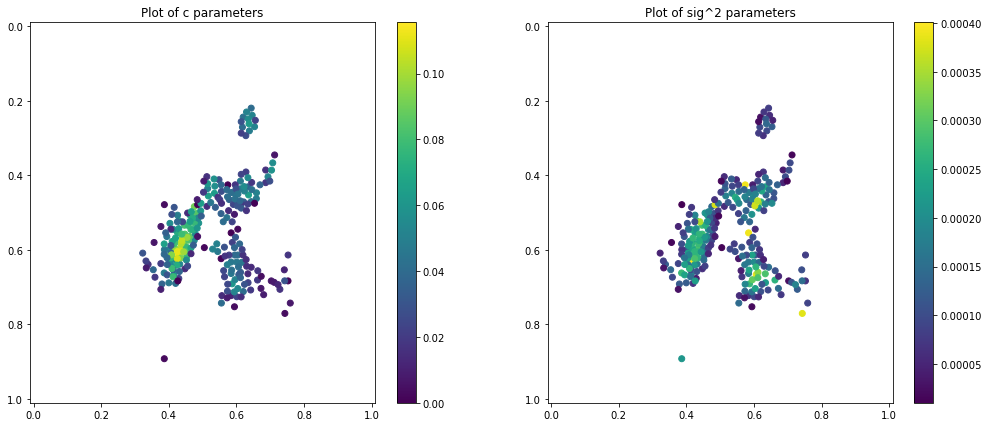

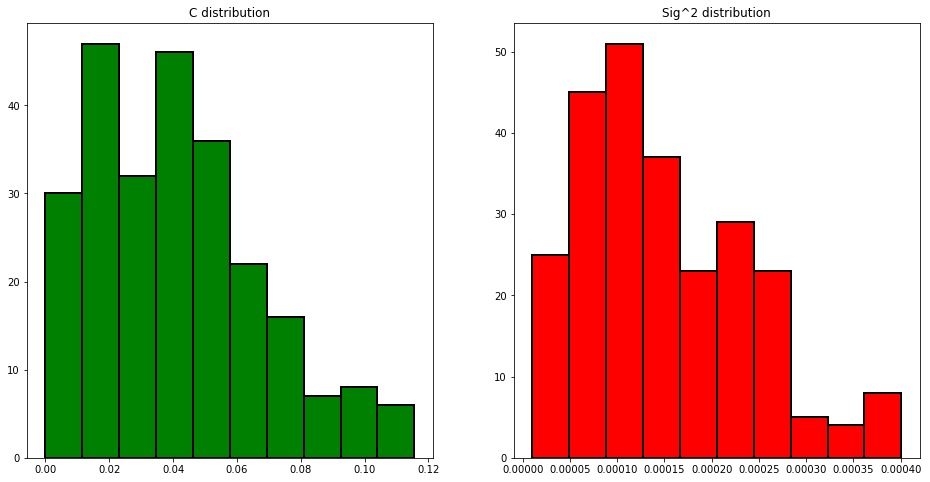

##########################################################################################
Processing example with alpha1: 7.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004221906039508573
Residual Variance: 1.7236821442597725e-05
Residual Entropy: 7.1559681765498295
Added Flux: 1.0936377665618324
Total elapsed time: 229.05225920677185 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02991919609745645
Mean min distance between collocation and center points: 0.009675651578065003

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

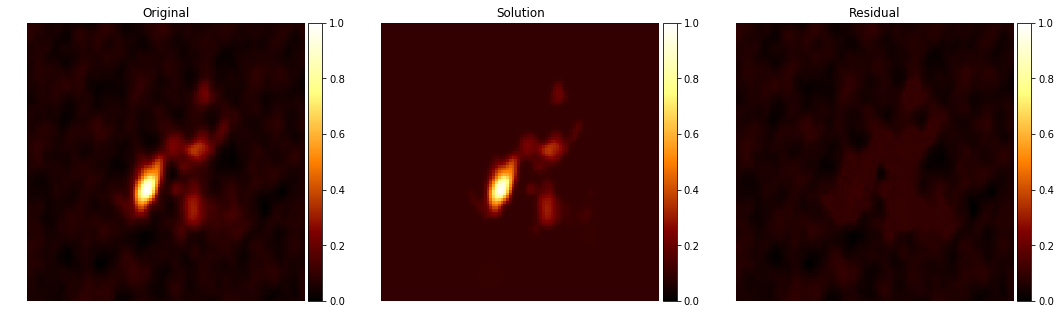

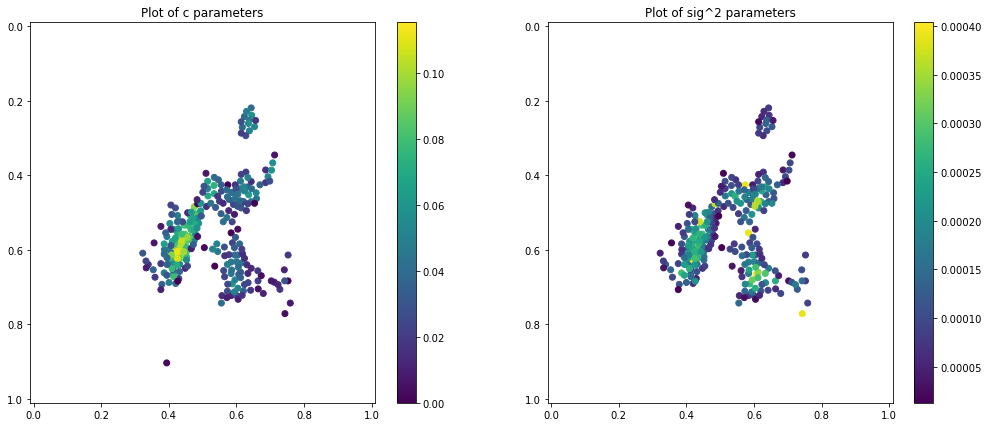

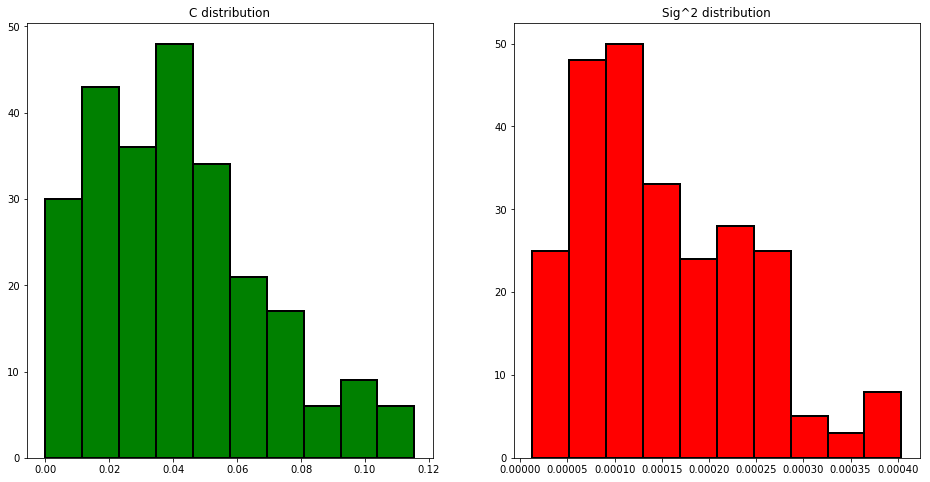

##########################################################################################
Processing example with alpha1: 7.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100114

Residual stats:
Residual RMS: 0.004251274904065965
Residual Variance: 1.7525650011079683e-05
Residual Entropy: 7.103839925488293
Added Flux: 1.105478032789089
Total elapsed time: 230.50229668617249 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03345970557144643
Mean min distance between collocation and center points: 0.009646688201014714

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

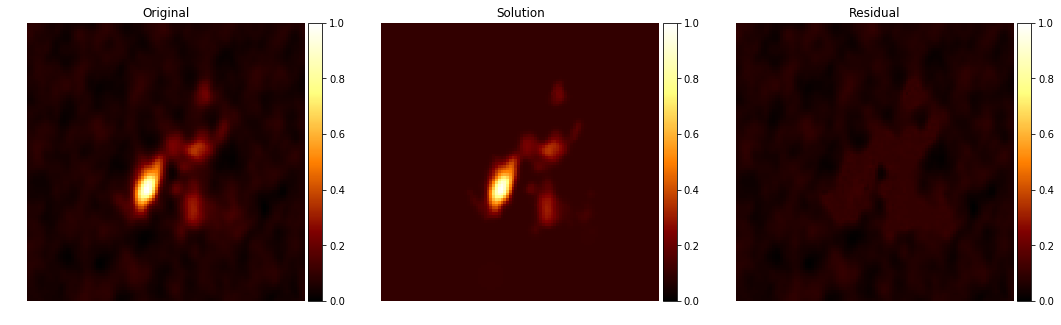

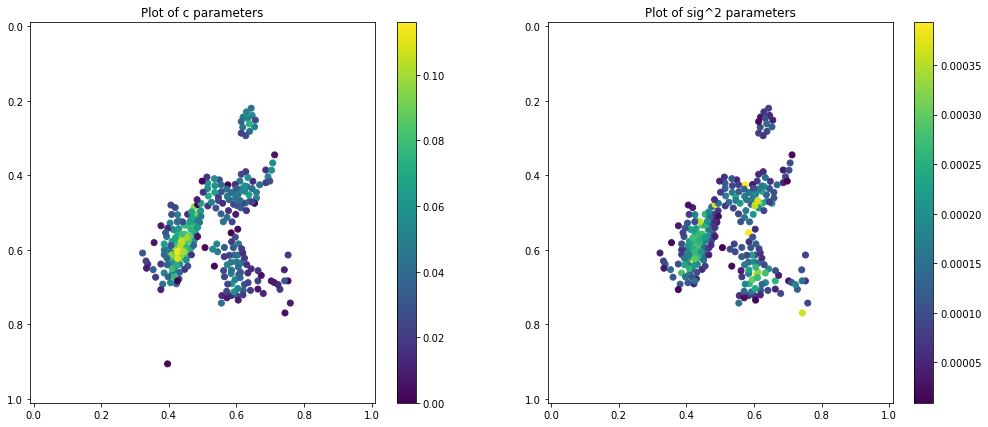

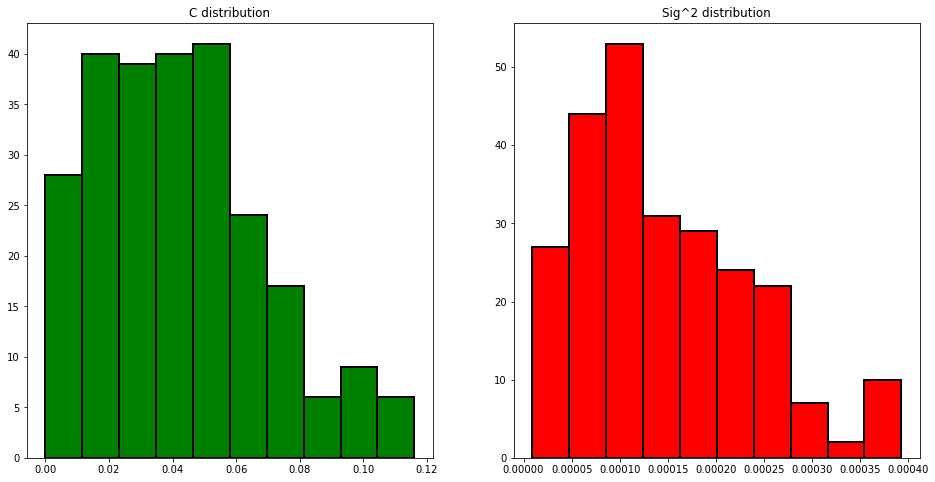

##########################################################################################
Processing example with alpha1: 8.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004254639645886685
Residual Variance: 1.7452193588915303e-05
Residual Entropy: 7.160341911695352
Added Flux: 1.0817504762825214
Total elapsed time: 226.16403102874756 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02936309185494781
Mean min distance between collocation and center points: 0.009764296498747976

Homogeneity of solution:
Mean min distance in the (standarized) parameters sp

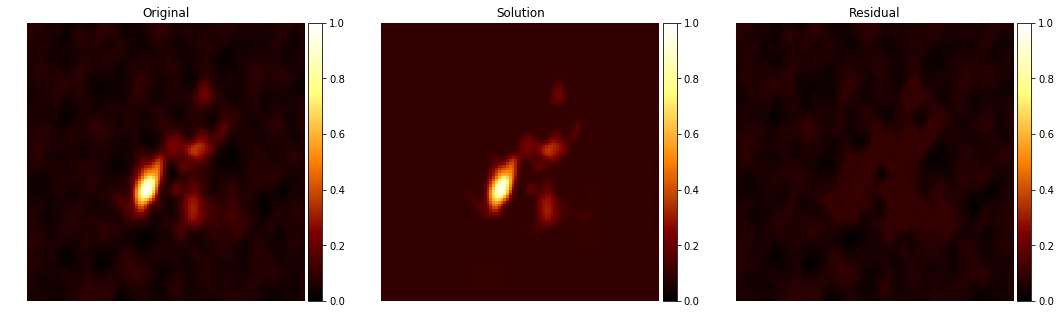

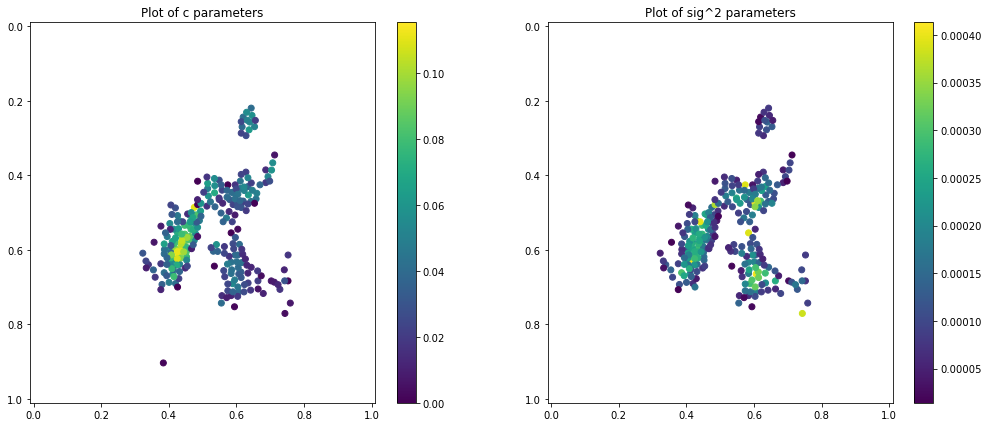

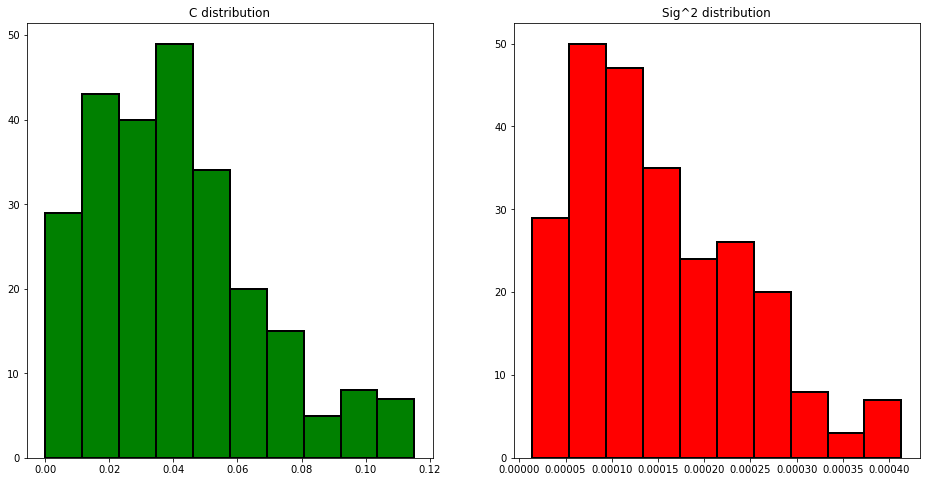

##########################################################################################
Processing example with alpha1: 8.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004323142179568524
Residual Variance: 1.810924235159328e-05
Residual Entropy: 7.07291386820796
Added Flux: 1.1116052354706836
Total elapsed time: 226.16602396965027 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.033097248399154705
Mean min distance between collocation and center points: 0.009607781664303143

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

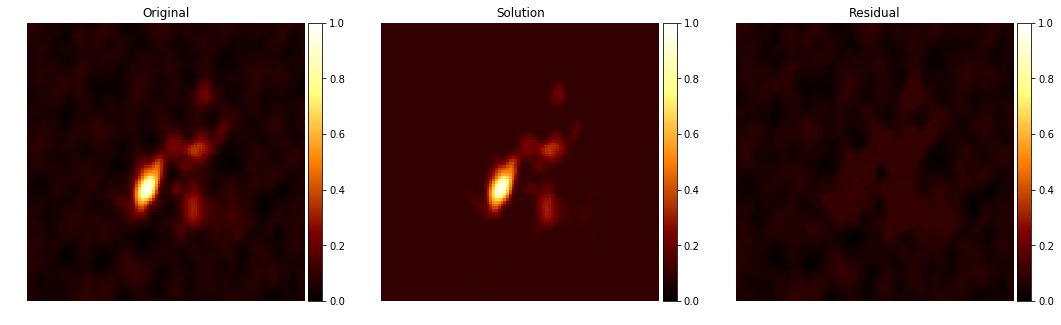

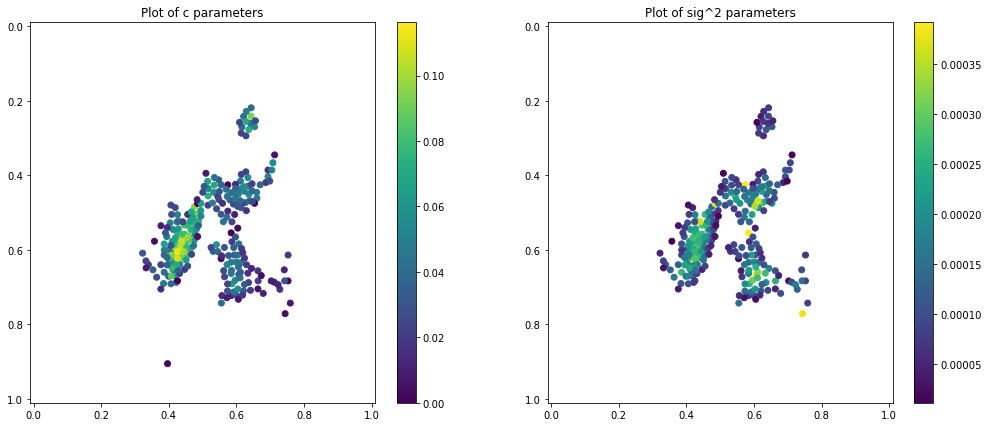

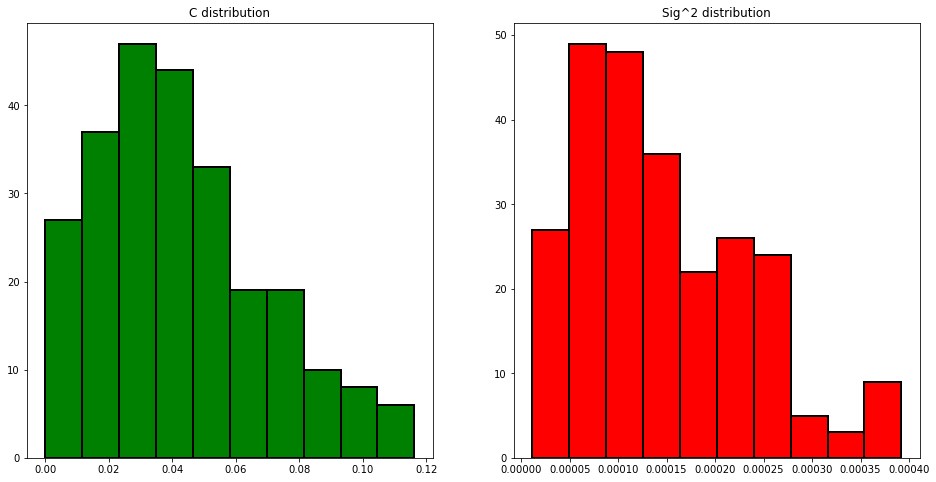

##########################################################################################
Processing example with alpha1: 9.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004325476671059547
Residual Variance: 1.8085467347357527e-05
Residual Entropy: 7.091981426957034
Added Flux: 1.1007441097684416
Total elapsed time: 225.30595803260803 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029397280292732048
Mean min distance between collocation and center points: 0.009576602762430499

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

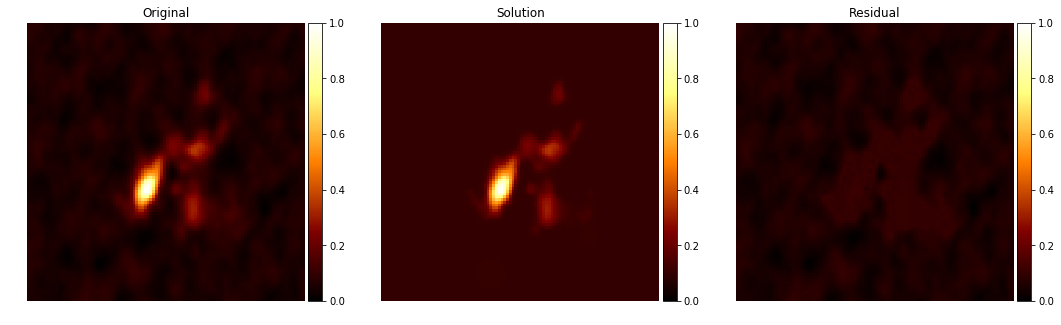

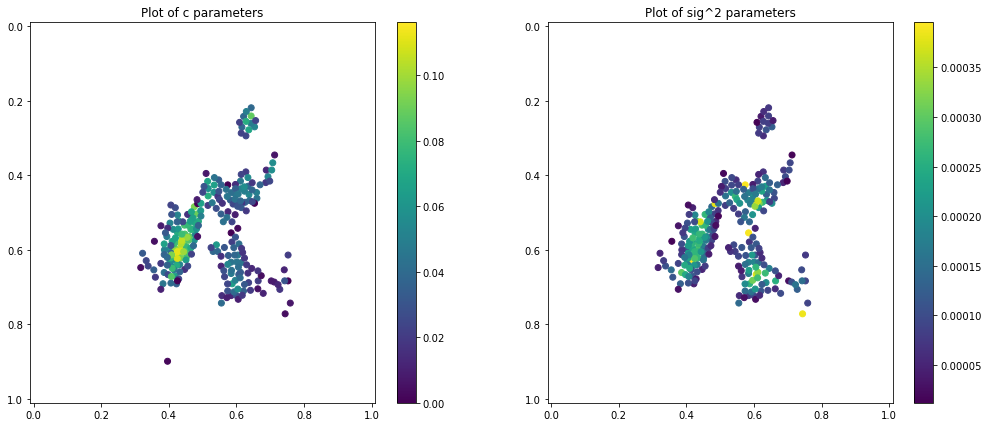

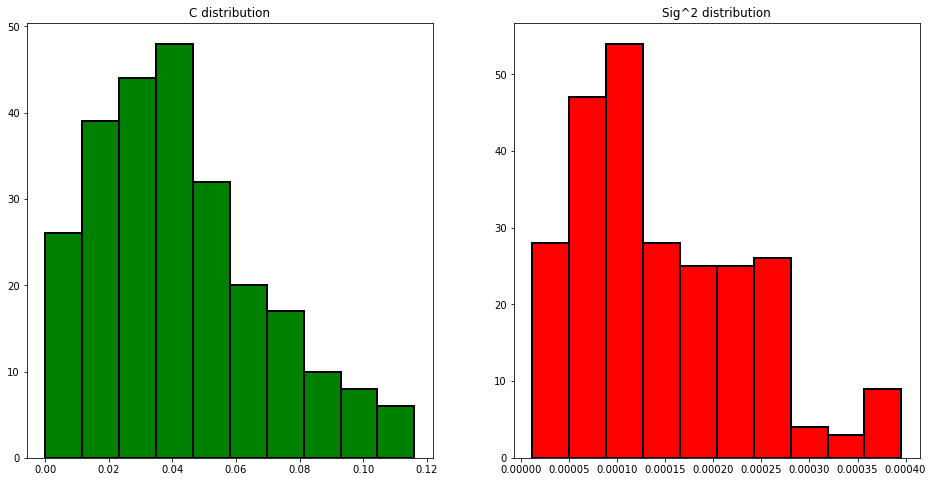

##########################################################################################
Processing example with alpha1: 9.5
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004389131208526958
Residual Variance: 1.8505034005921024e-05
Residual Entropy: 7.068330972182546
Added Flux: 1.093941589810392
Total elapsed time: 224.9153151512146 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.034424393098360935
Mean min distance between collocation and center points: 0.009759572199079119

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

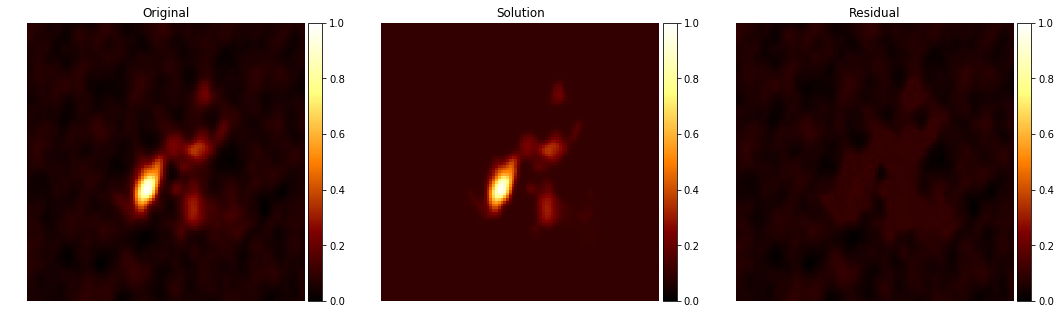

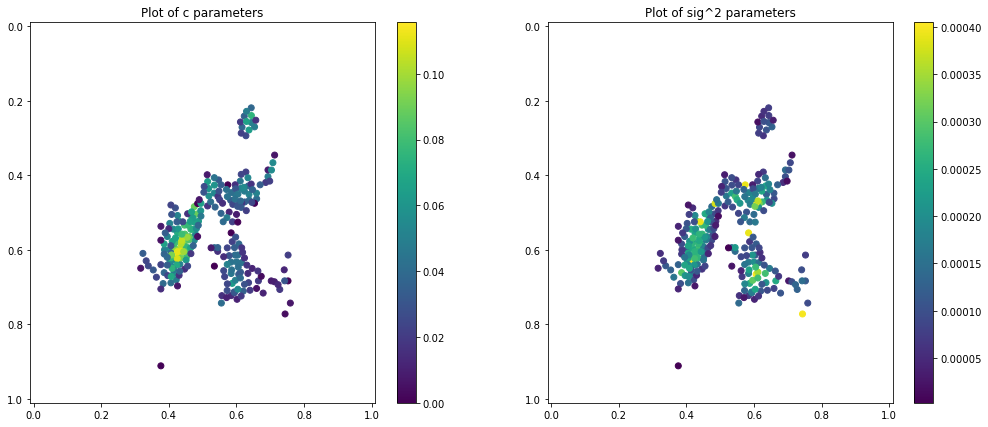

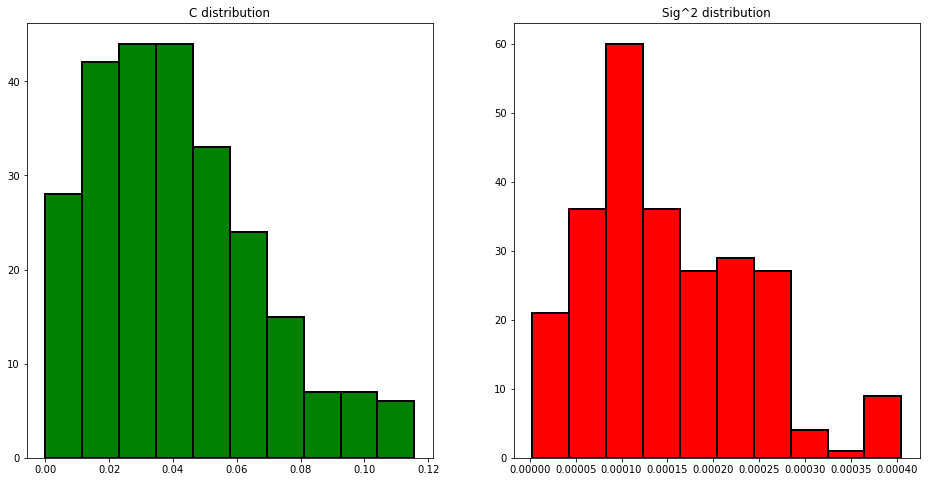

##########################################################################################
Processing example with alpha1: 10.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100110

Residual stats:
Residual RMS: 0.004420467468868292
Residual Variance: 1.876777442979562e-05
Residual Entropy: 7.073880560520985
Added Flux: 1.1008010527413563
Total elapsed time: 223.7037069797516 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03625511580195001
Mean min distance between collocation and center points: 0.009742432619928819

Homogeneity of solution:
Mean min distance in the (standarized) parameters spa

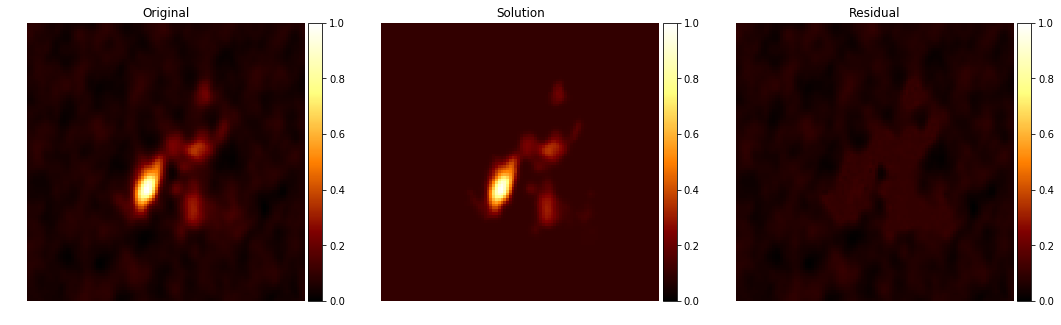

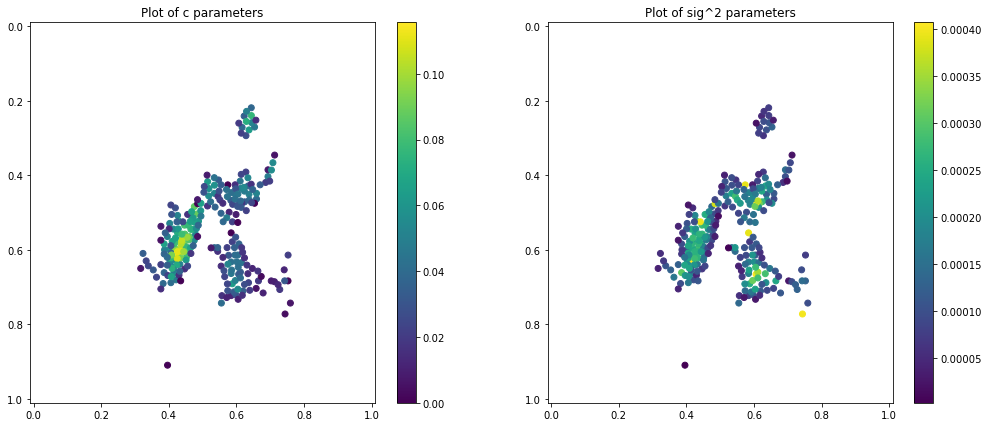

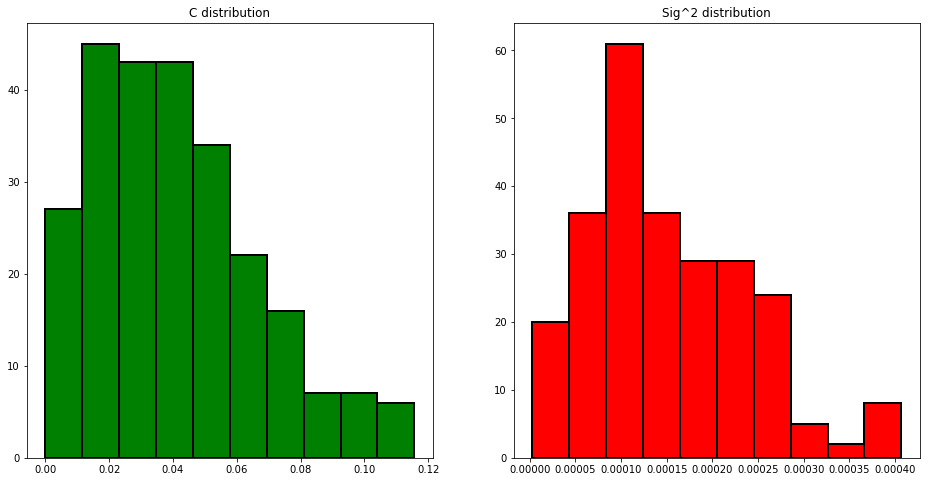

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha1: {0}'.format(elm.a))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    
#pickling results
target = open("exp02_alpha1_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()

In [8]:
alphas = [elm.a for elm in elm_list]
r_stats = [elm.get_residual_stats() for elm in elm_list]
variance = [var for (var,_,_,_) in r_stats]
entropy = [entr for (_,entr,_,_) in r_stats]
rms = [rms for (_,_,rms,_) in r_stats]
flux = [flux for (_,_,_,flux) in r_stats]

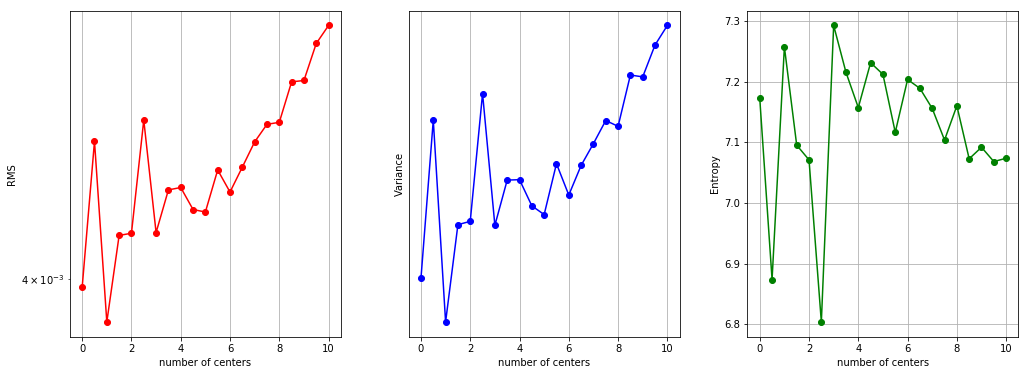

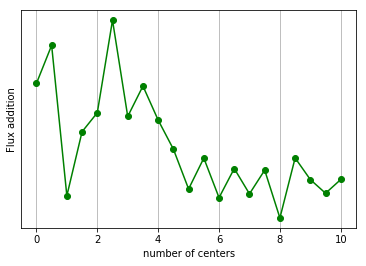

In [9]:
fig = plt.figure(figsize=(17,6))
fig.subplots_adjust(wspace=0.25)
plt.subplot(1,3,1)
plt.semilogy(alphas, rms, 'ro-')
#plt.title('RMS')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('RMS')

ax = plt.subplot(1,3,2)
plt.semilogy(alphas, variance, 'bo-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Variance')
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.0e'))

plt.subplot(1,3,3)
plt.plot(alphas, entropy, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Entropy')

plt.show()


plt.semilogy(alphas, flux, 'go-')
#plt.title('Entropy')
plt.grid()
plt.xlabel('number of centers')
plt.ylabel('Flux addition')
plt.show()

## `Case 2 `:   $\alpha_2 = [10^{-10},10^0]$ 

In [10]:
elm_list = list()
alpha2 = np.array([10**-n for n in range(0,11)])

for a2 in alpha2:
    # common parameters
    minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
    maxsig = 30*minsig

    # number of points of each type
    Nc = 250
    #Nb = int(0.2* np.sum(boundary_map(data, base_level))) #20% of boundary pixels
    Nb = int(0.2*250)
    Ne = 4*Nc-Nb

    # points generation
    center_points = random_centers_generation(data, Nc, base_level=base_level, power=3.)
    collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
    boundary_points = boundary_points_generation(data, base_level, Nb)

    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]

    ## visualizing the choosen points
    #points_plot(data, center_points=center_points, title="Center Points")
    #points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


    #solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
    #params_plot(c0, sig0, xc, yc)
    #params_distribution_plot(c0, sig0)
    elm_list.append( ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0, lamb1=1., b=a2, lamb2=1.,
                    d1psi1=d1psi, d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1.) )

##########################################################################################
Processing example with alpha2: 1.0
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 11023

Residual stats:
Residual RMS: 0.6973559937480314
Residual Variance: 0.4162270800065452
Residual Entropy: 5.610116973181369
Added Flux: 263.78436895235774
Total elapsed time: 43.95159196853638 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03855681928212712
Mean min distance between collocation and center points: 0.010201347171208344

Homogeneity of solution:
Mean min distance in the (standarized) paramet

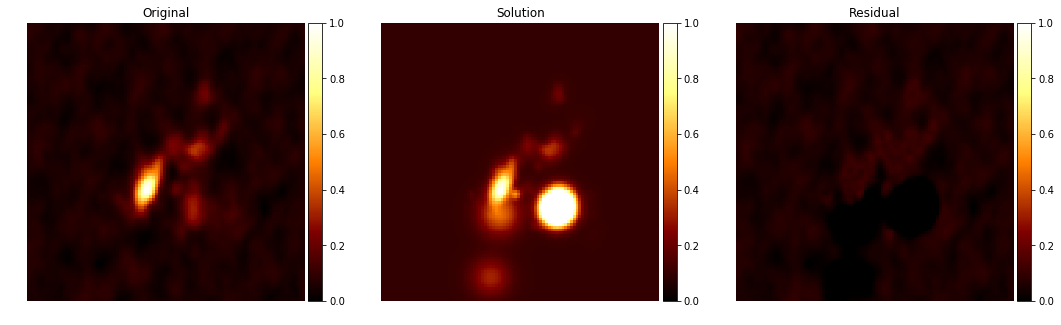

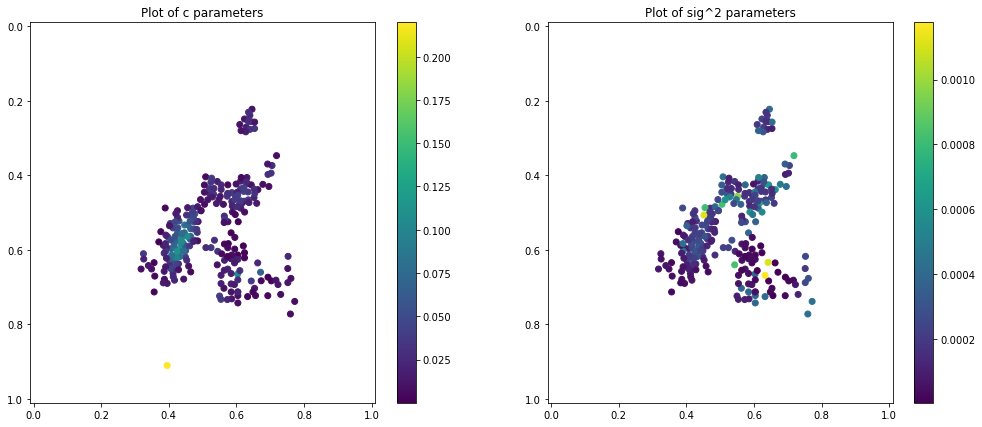

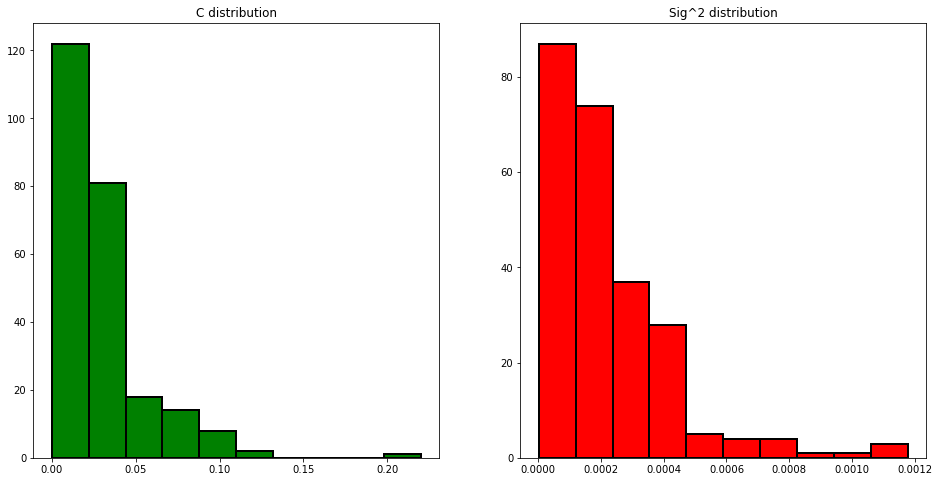

##########################################################################################
Processing example with alpha2: 0.1
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 17031

Residual stats:
Residual RMS: 0.05646365418572011
Residual Variance: 0.002546235094236574
Residual Entropy: 7.105606020372779
Added Flux: 28.23715246821036
Total elapsed time: 64.1186408996582 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.038555859501492644
Mean min distance between collocation and center points: 0.010279679056031468

Homogeneity of solution:
Mean min distance in the (standarized) param

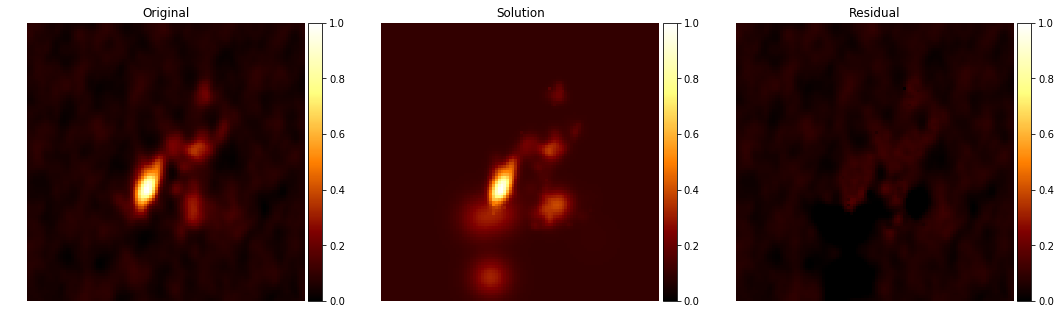

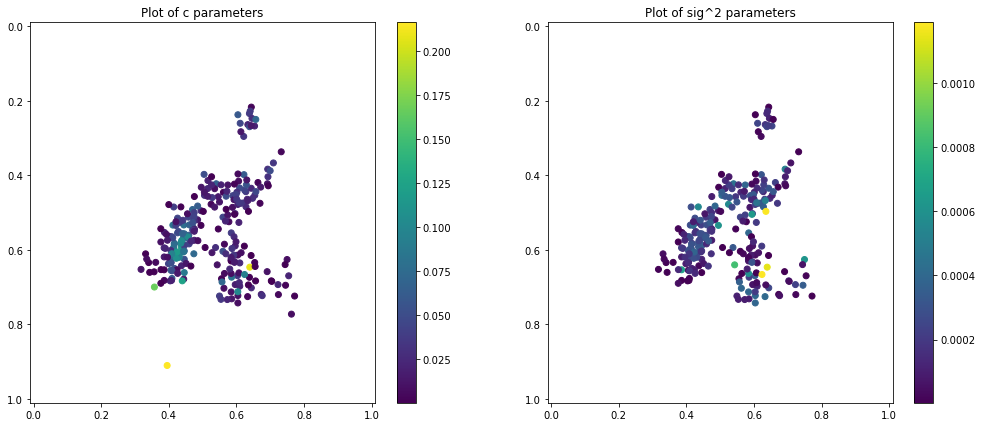

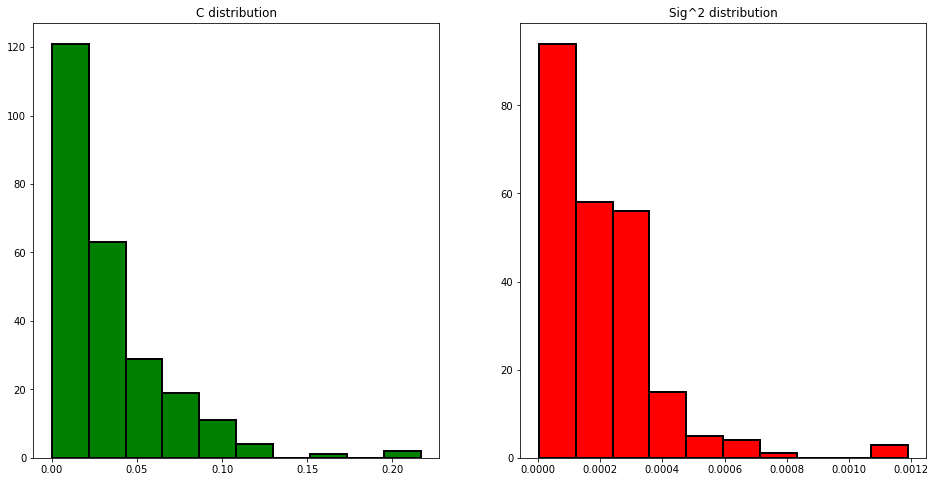

##########################################################################################
Processing example with alpha2: 0.01
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 13026

Residual stats:
Residual RMS: 0.02612144766287966
Residual Variance: 0.0005200851549230154
Residual Entropy: 6.9985753465779315
Added Flux: 14.617683841461686
Total elapsed time: 49.10389971733093 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03853243826687195
Mean min distance between collocation and center points: 0.010298233027956013

Homogeneity of solution:
Mean min distance in the (standarized) p

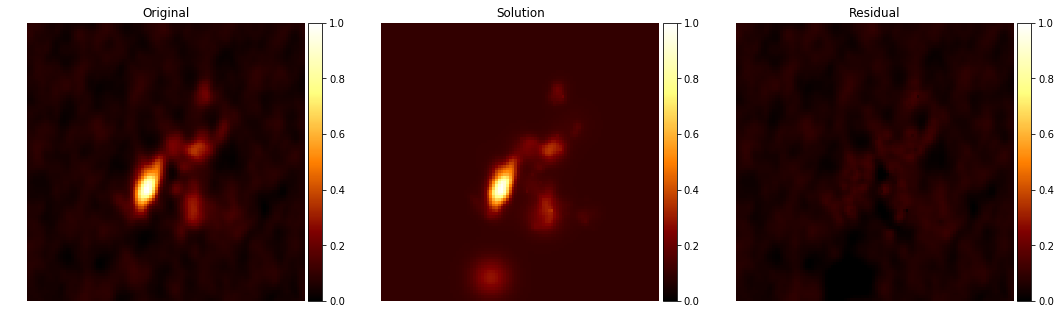

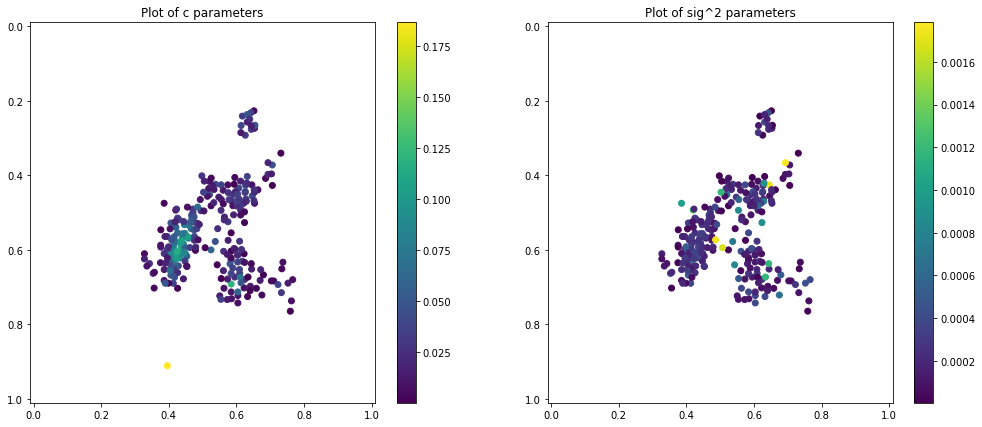

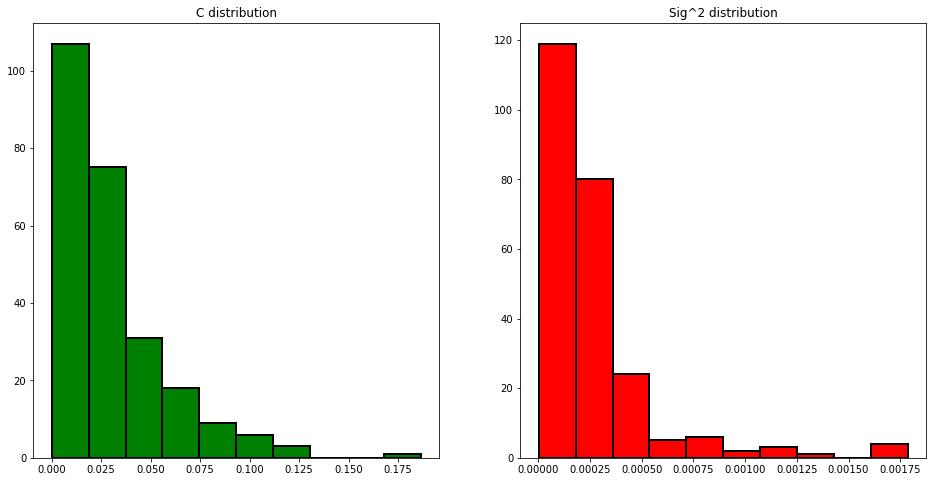

##########################################################################################
Processing example with alpha2: 0.001
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 9021

Residual stats:
Residual RMS: 0.016564619004330924
Residual Variance: 0.00027360889864801044
Residual Entropy: 7.340946257642135
Added Flux: 6.720663197628912
Total elapsed time: 37.34059762954712 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03866459751269826
Mean min distance between collocation and center points: 0.01041135214689619

Homogeneity of solution:
Mean min distance in the (standarized) pa

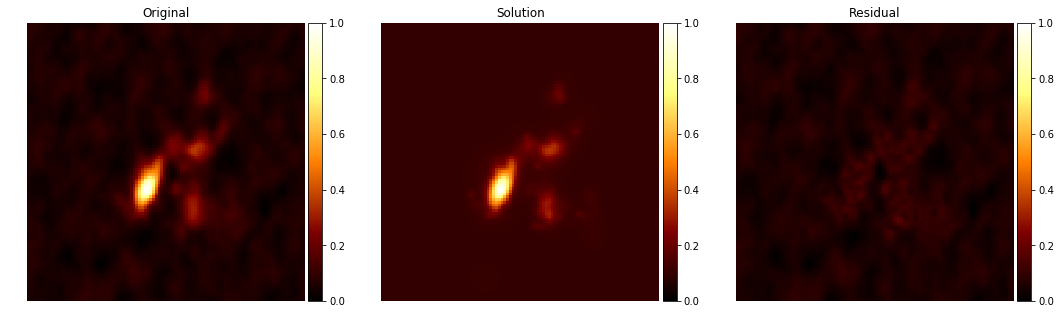

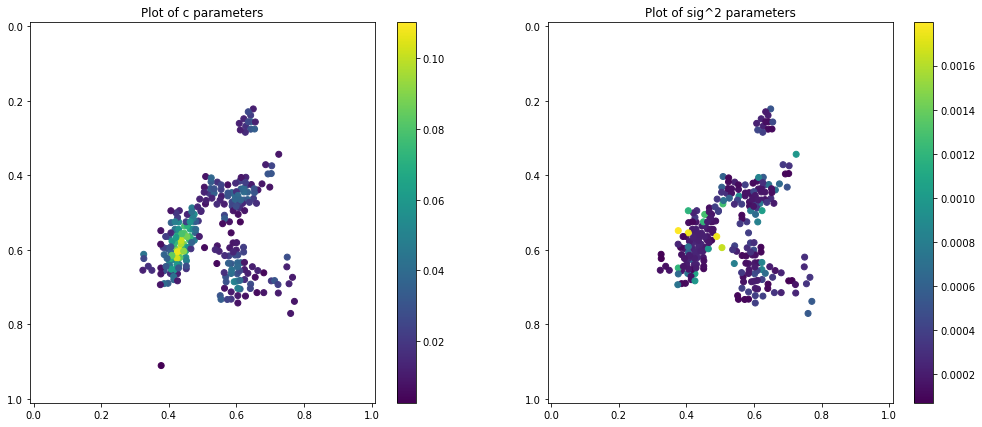

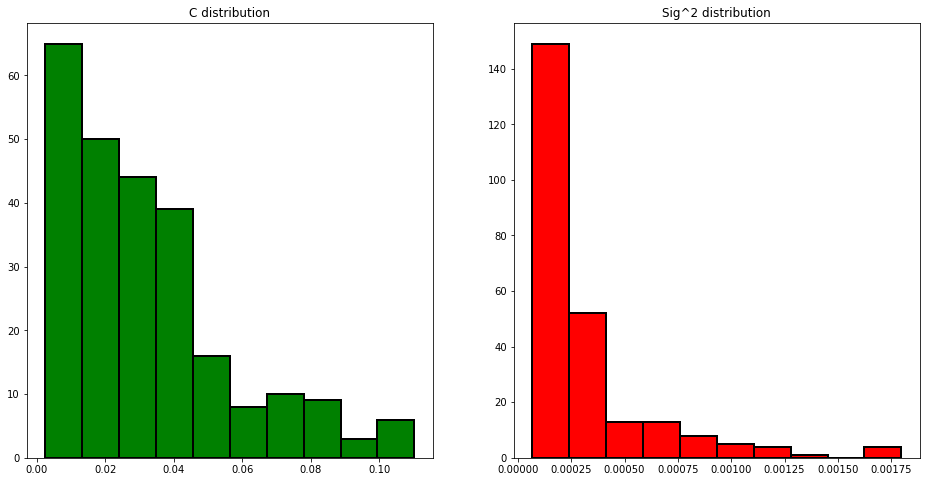

##########################################################################################
Processing example with alpha2: 0.0001
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 21035

Residual stats:
Residual RMS: 0.006698256614898422
Residual Variance: 4.482471898712894e-05
Residual Entropy: 7.140553544100758
Added Flux: 2.4972435591161606
Total elapsed time: 75.60620164871216 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03717806141099139
Mean min distance between collocation and center points: 0.010511590998797055

Homogeneity of solution:
Mean min distance in the (standarized)

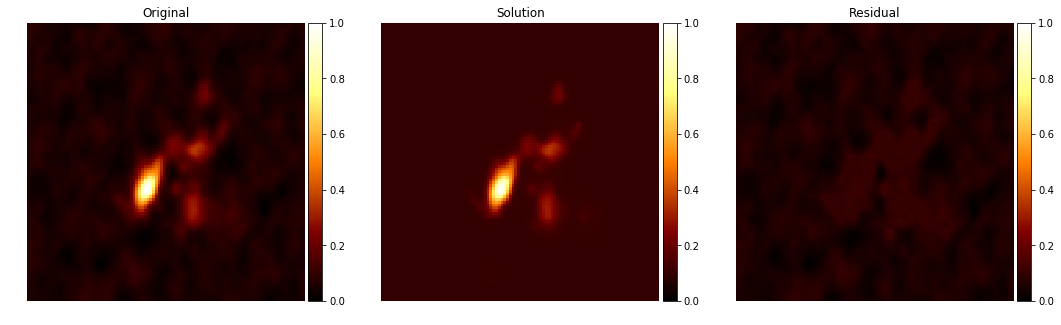

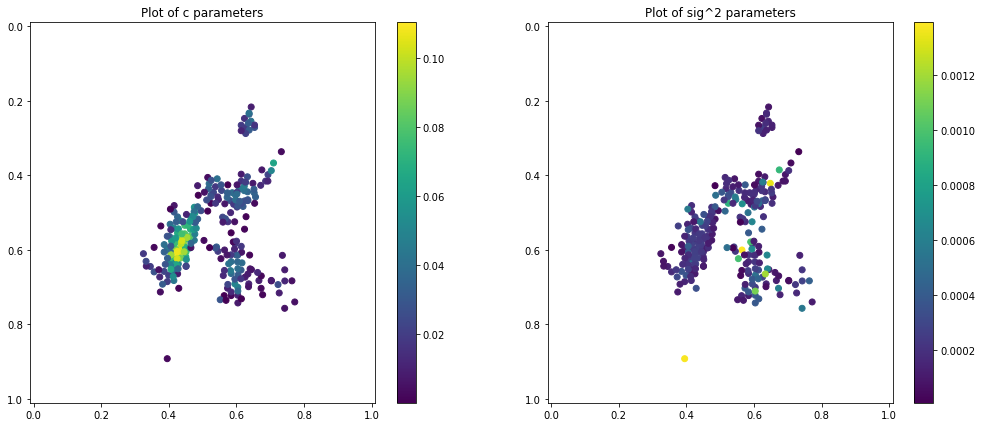

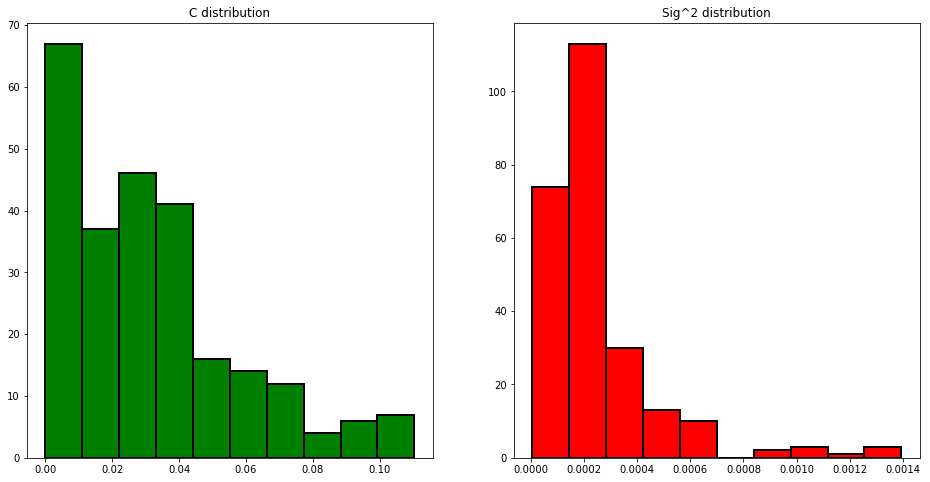

##########################################################################################
Processing example with alpha2: 1e-05
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 21036

Residual stats:
Residual RMS: 0.0048103842496150725
Residual Variance: 2.3095616771174235e-05
Residual Entropy: 7.29616922689085
Added Flux: 1.6434870804743056
Total elapsed time: 75.90956163406372 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03187401577295425
Mean min distance between collocation and center points: 0.010228523112134605

Homogeneity of solution:
Mean min distance in the (standarized)

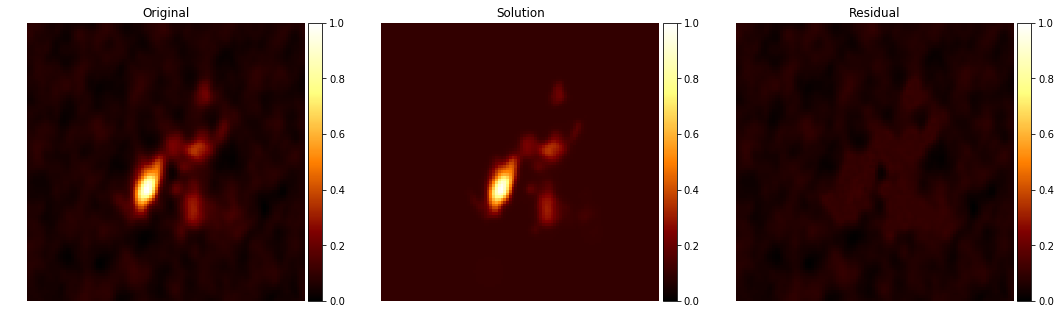

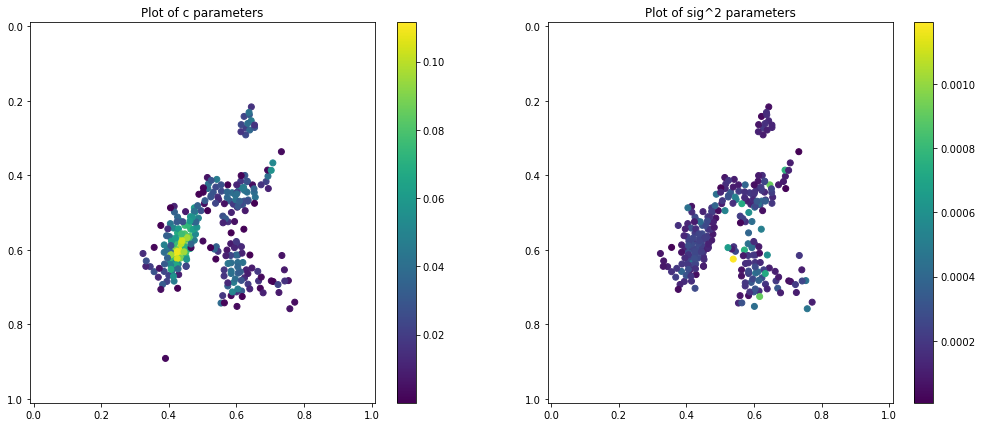

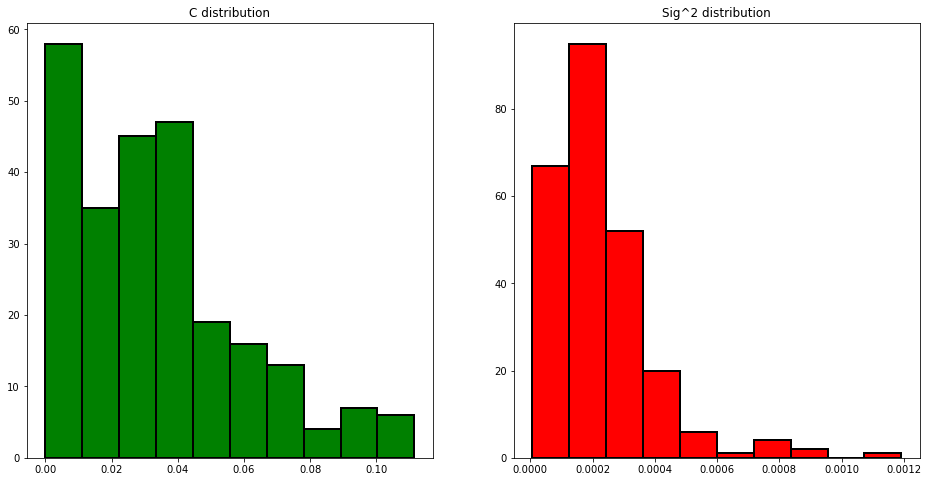

##########################################################################################
Processing example with alpha2: 1e-06
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: True
status: 2
message: The relative error between two consecutive iterates is at most 0.000000
nfev: 75091

Residual stats:
Residual RMS: 0.003990908620559502
Residual Variance: 1.569438307185342e-05
Residual Entropy: 7.117821518643973
Added Flux: 1.1467462225457834
Total elapsed time: 222.15103340148926 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029460648355796926
Mean min distance between collocation and center points: 0.009630033158618637

Homogeneity of solution:
Mean min distance in the (standarized

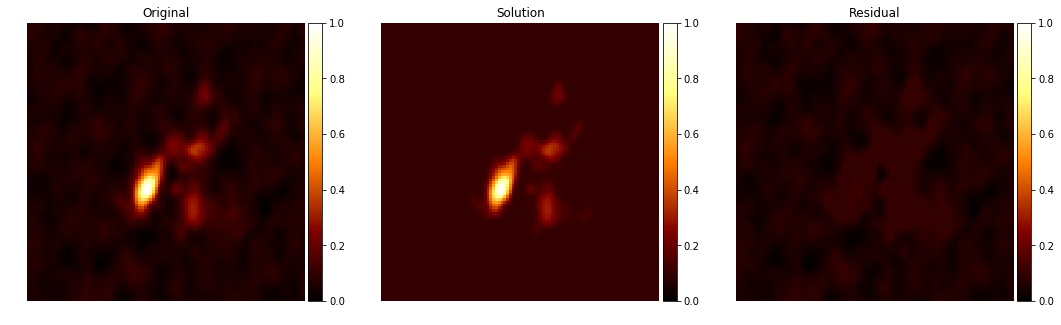

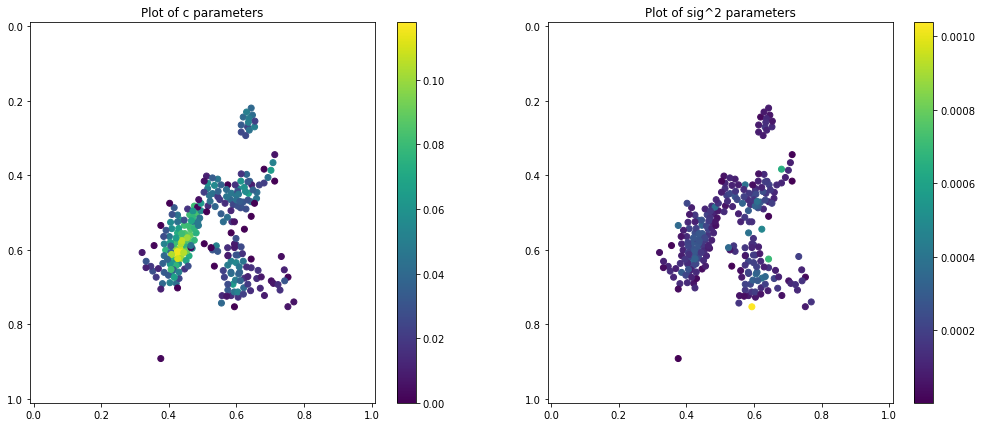

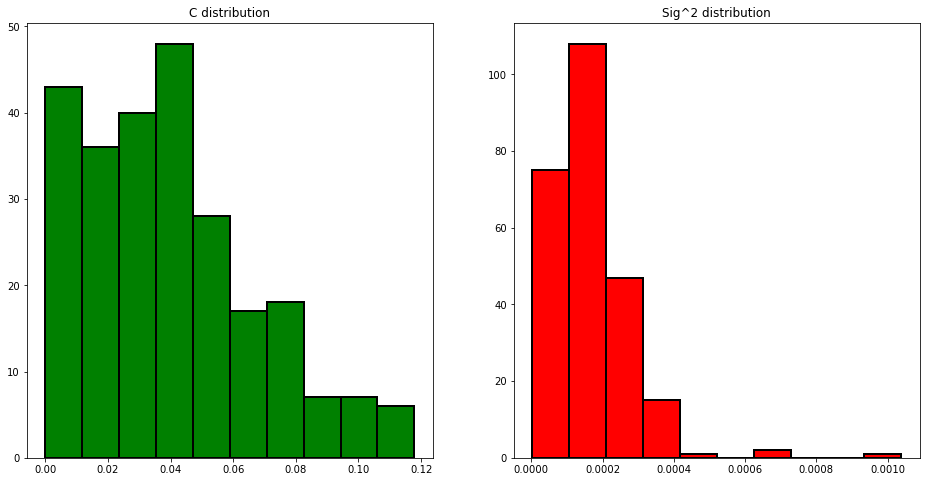

##########################################################################################
Processing example with alpha2: 1e-07
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004132736434906521
Residual Variance: 1.688507231603988e-05
Residual Entropy: 7.153096941423603
Added Flux: 1.2105382846505761
Total elapsed time: 286.44088554382324 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029463815512331994
Mean min distance between collocation and center points: 0.009364462481485895

Homogeneity of solution:
Mean min distance in the (standarized) parameters 

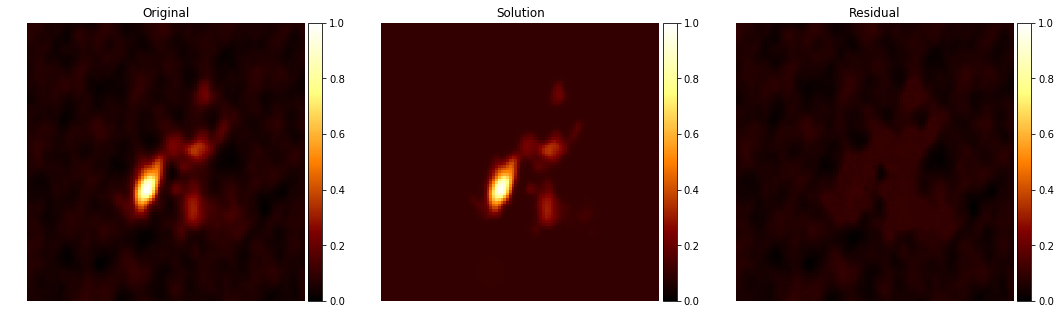

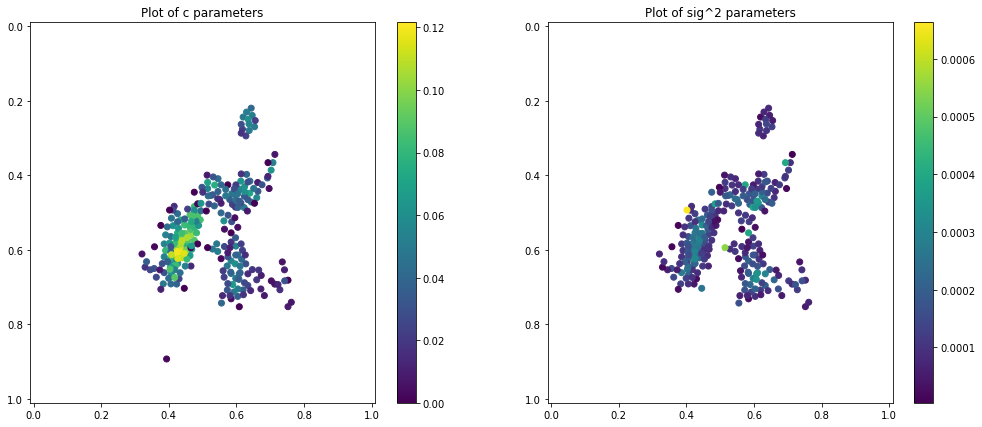

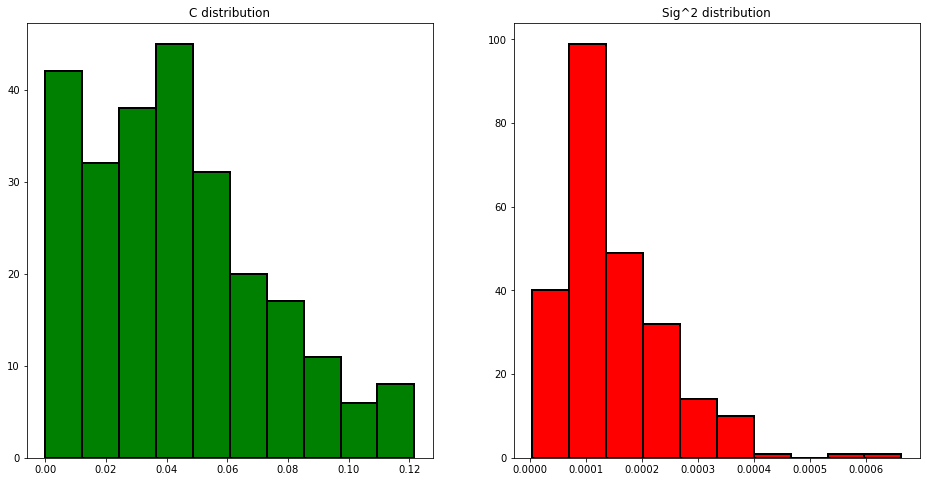

##########################################################################################
Processing example with alpha2: 1e-08
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100112

Residual stats:
Residual RMS: 0.004009664058802577
Residual Variance: 1.584085420045974e-05
Residual Entropy: 7.1644399598268915
Added Flux: 1.1569800559930554
Total elapsed time: 286.2106878757477 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02946558361331547
Mean min distance between collocation and center points: 0.009442584809645242

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

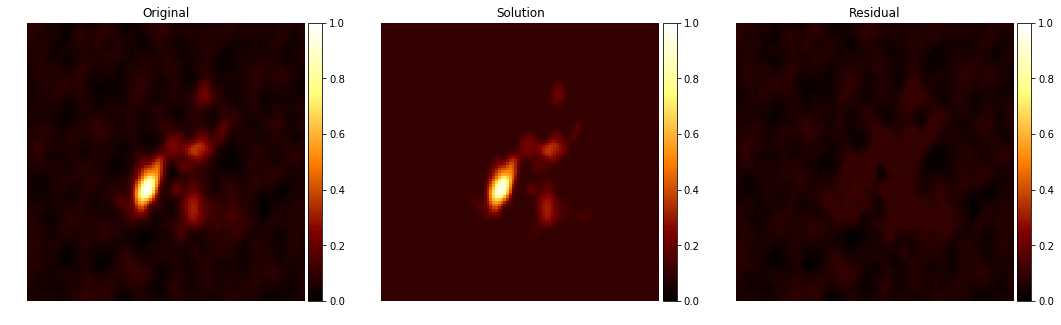

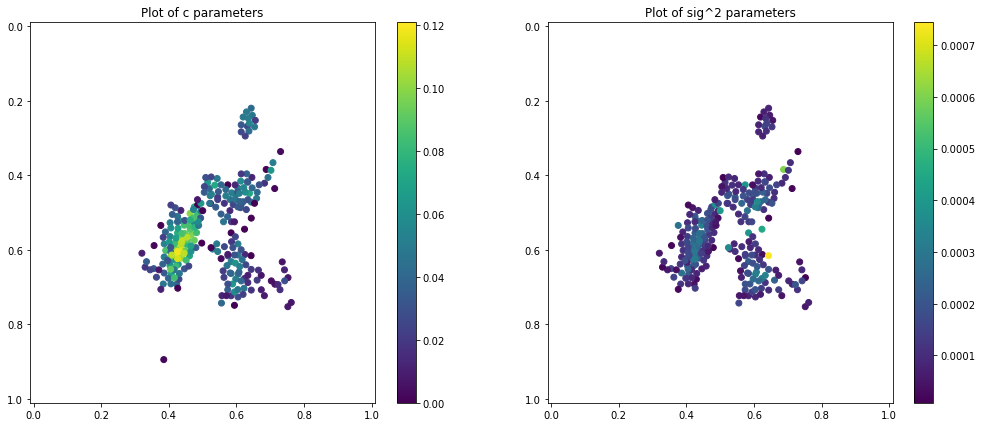

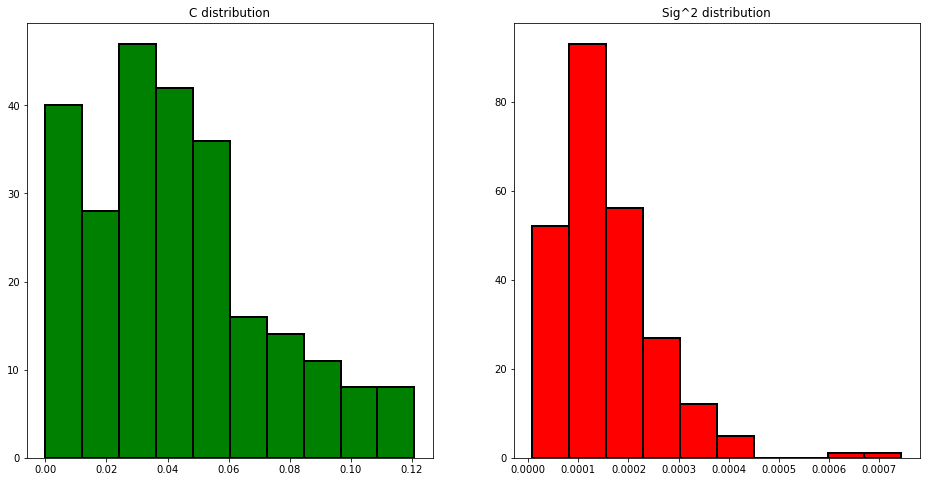

##########################################################################################
Processing example with alpha2: 1e-09
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100114

Residual stats:
Residual RMS: 0.00437595956438233
Residual Variance: 1.89328848900509e-05
Residual Entropy: 6.692476772525627
Added Flux: 1.219064778889279
Total elapsed time: 287.4465413093567 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03180129480025898
Mean min distance between collocation and center points: 0.009448329837645129

Homogeneity of solution:
Mean min distance in the (standarized) parameters space

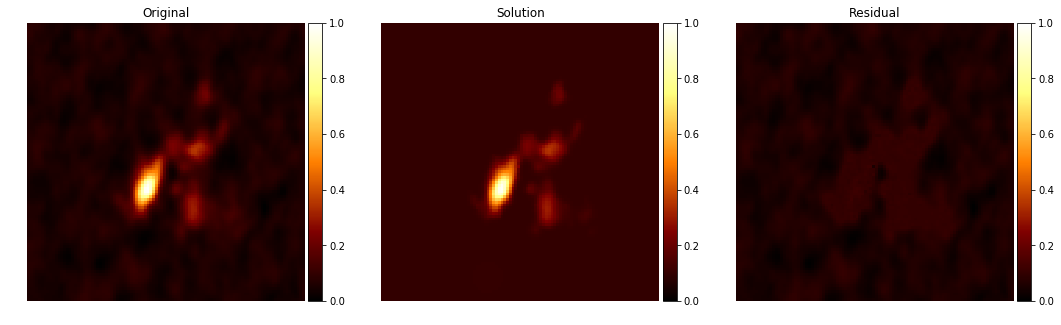

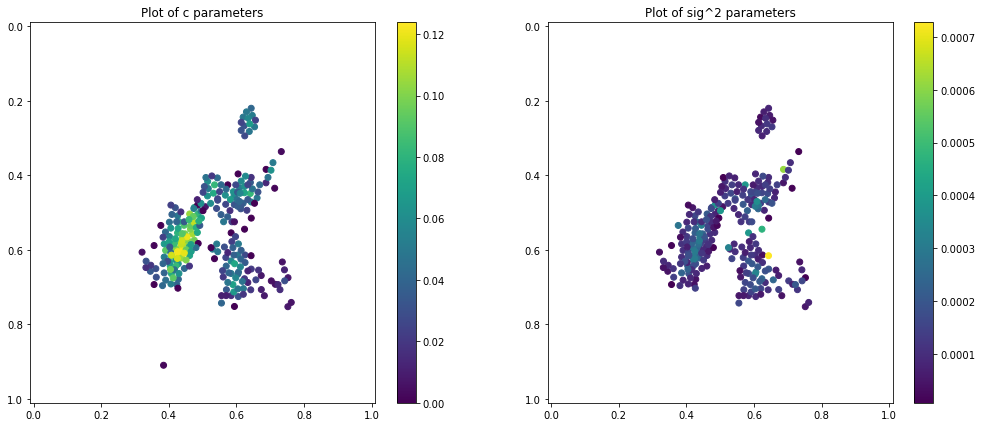

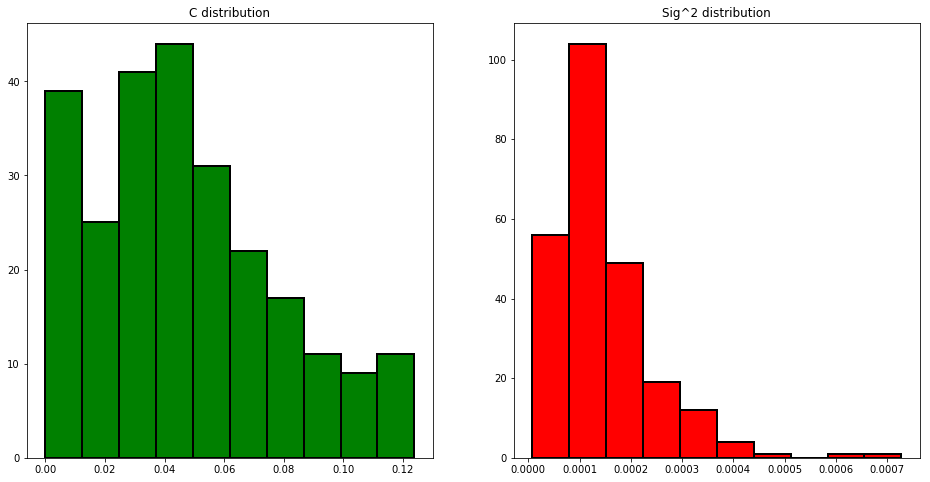

##########################################################################################
Processing example with alpha2: 1e-10
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.004061406446751222
Residual Variance: 1.62483499513752e-05
Residual Entropy: 7.180341699844252
Added Flux: 1.1721762456224527
Total elapsed time: 285.03952860832214 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.029717360699347637
Mean min distance between collocation and center points: 0.009389375473939783

Homogeneity of solution:
Mean min distance in the (standarized) parameters s

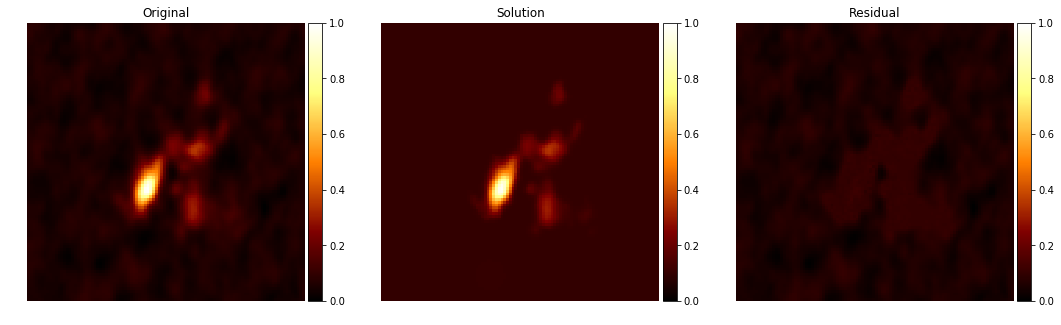

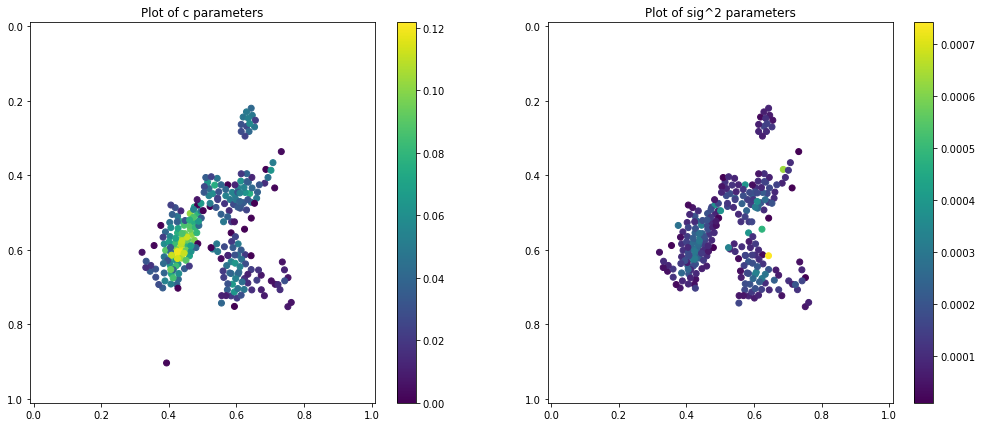

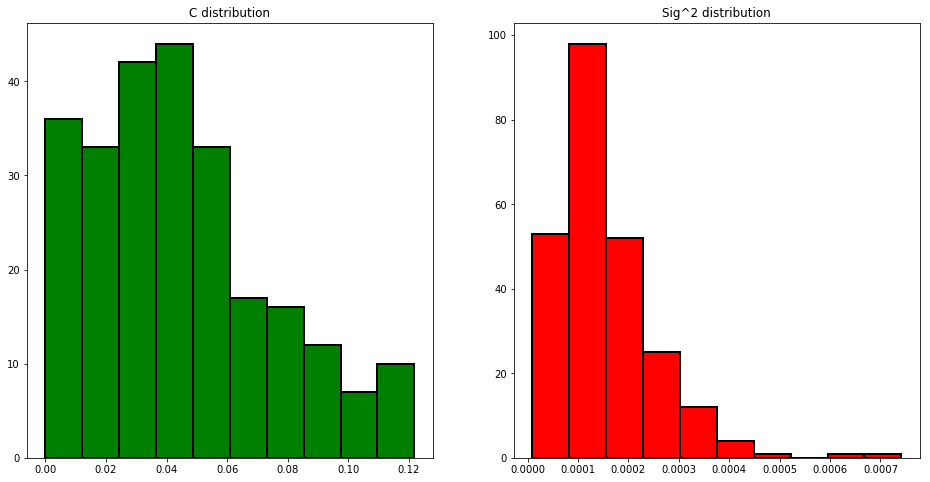

In [11]:
for elm in elm_list:
    print('#'*90)
    print('Processing example with alpha2: {0}'.format(elm.b))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    
#pickling results
target = open("exp02_alpha2_orion.pkl", "wb")
pickle.dump(elm_list, target)
target.close()